## Preamble

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "/content/drive/MyDrive/KC10_23 - Transaction Data.csv"
df = pd.read_csv(file_path)

In [3]:
df.head(10)

,date,name,amount,balance,account_subtype,payment_meta,category
0,2019/12/9,7-eleven,-1.53,269.33,checking,NaN,Shopping
1,2019/12/9,parkingmeter1 877242790 chicago il 12/07,-2.33,280.12,checking,NaN,Transportation
2,2019/12/9,parkingmeter1 877242790 chicago il 12/08,-3.26,282.45,checking,NaN,Transportation
3,2019/12/9,mcdonald's,-9.26,270.86,checking,Fast Food,Restaurant
4,2019/12/9,quickpay with zelle payment to josiah jpm30152...,-20.00,285.71,checking,Chase QuickPay,Samebank Transfer
5,2019/12/9,"stubhub, inc. ca 12/09",-85.25,305.71,checking,NaN,Entertainment
6,2019/12/10,frannies cafe chicago il 12/09,-1.93,249.07,checking,NaN,Restaurant
7,2019/12/10,spotify,-4.99,264.34,checking,NaN,Entertainment
8,2019/12/10,amk columbia csc coffee chicago il 12/09,-5.51,243.56,checking,Coffee Shop,Restaurant
9,2019/12/10,mcdonald's,-13.34,251.00,checking,Fast Food,Restaurant


In [4]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4602 entries, 0 to 4601
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             4602 non-null   datetime64[ns]
 1   name             4602 non-null   object        
 2   amount           4602 non-null   float64       
 3   balance          4602 non-null   float64       
 4   account_subtype  4602 non-null   object        
 5   payment_meta     1138 non-null   object        
 6   category         4602 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 251.8+ KB


In [6]:
df.describe()

,date,amount,balance
count,4602,4602.000000,4602.000000
mean,2022-03-09 09:26:40.521512192,-2.689974,158.962462
min,2019-12-09 00:00:00,-5191.680000,-2907.980000
25%,2021-05-18 06:00:00,-38.200000,-272.927500
50%,2022-04-04 00:00:00,-12.000000,142.890000
75%,2022-12-05 00:00:00,-2.092500,495.355000
max,2024-04-08 00:00:00,7110.000000,8000.000000
std,NaN,299.881227,841.381127


## Question 1

### Analyze the bank statement to verify income and assess the applicants financial capacity

In [7]:
import pandas as pd
# 1. Filter for income transactions (assuming positive amounts are income)
income_df = df[df['amount'] > 0]
debit_df = df[df['amount'] < 0]
# Reset the index and drop the old index
income_df.reset_index(drop=True, inplace=True)
debit_df.reset_index(drop=True, inplace=True)

In [8]:
# Analyze consistency of amounts and dates
income_by_name = income_df.groupby(['name', pd.Grouper(key='date', freq='ME')])['amount'].sum().reset_index()
# Sort the resulting DataFrame in descending order by 'amount'
income_by_name = income_by_name.sort_values(by='amount', ascending=False).reset_index(drop=True)

# Check for consistency in amounts (bonus: evaluating stability via standard deviation)
income_stability = income_df.groupby('name')['amount'].std().reset_index().rename(columns={'amount': 'std_dev'})

In [9]:
top_10 = income_by_name.head(10)
print("The top 10 transfer income")
top_10

The top 10 transfer income


,name,date,amount
0,online transfer from sav ...,2020-09-30,7590.03
1,crb upstart loan ppd,2022-06-30,7110.00
2,western union,2023-06-30,3759.85
3,online transfer from chk ...,2020-07-31,3100.00
4,irs treas tax ref ppd,2021-02-28,2873.03
5,online transfer from chk ...,2021-03-31,2862.00
6,concord music ha payroll ppd,2022-04-30,2780.74
7,the gauge collec payroll ppd,2023-12-31,2620.00
8,fedwire credit barclays bank cheyenne mcintyre...,2023-04-30,2439.49
9,western union,2023-04-30,2435.04


In [10]:
income_df

,date,name,amount,balance,account_subtype,payment_meta,category
0,2019-12-13,new caps llc pr deposit ppd,377.64,403.22,checking,NaN,Salary
1,2019-12-13,online transfer from chk ...,200.00,-620.00,checking,NaN,Salary
2,2019-12-20,new caps llc pr deposit ppd,373.42,576.43,checking,NaN,Salary
3,2019-12-23,online transfer from chk ...,200.00,-420.00,checking,NaN,Salary
4,2019-12-23,atm cash deposit kentucky ave 2022-12-22,95.00,420.30,checking,ATM,Deposit
...,...,...,...,...,...,...,...
784,2024-03-26,online transfer from chk ...,600.00,353.02,checking,NaN,Salary
785,2024-03-27,online transfer from chk ...,12.00,0.00,checking,NaN,Refund
786,2024-04-01,remote online deposit,500.00,371.56,checking,NaN,Salary
787,2024-04-02,zelle payment from erik mcintyre,72.00,391.86,checking,NaN,Samebank Transfer


In [11]:
debit_df

,date,name,amount,balance,account_subtype,payment_meta,category
0,2019-12-09,7-eleven,-1.53,269.33,checking,NaN,Shopping
1,2019-12-09,parkingmeter1 877242790 chicago il 12/07,-2.33,280.12,checking,NaN,Transportation
2,2019-12-09,parkingmeter1 877242790 chicago il 12/08,-3.26,282.45,checking,NaN,Transportation
3,2019-12-09,mcdonald's,-9.26,270.86,checking,Fast Food,Restaurant
4,2019-12-09,quickpay with zelle payment to josiah jpm30152...,-20.00,285.71,checking,Chase QuickPay,Samebank Transfer
...,...,...,...,...,...,...,...
3808,2024-04-03,westbon inc 1000416162 ppd id: 9473530999,-123.56,-198.37,checking,NaN,Other Expense
3809,2024-04-04,applecard gsbank payment 15333265 web id: 9999...,-70.00,105.55,checking,NaN,Outflow Transfer
3810,2024-04-06,orig co name:itria ven sba co entry descr:ap p...,-18.38,-12.83,checking,Loans and Mortgages,Outflow Transfer
3811,2024-04-06,orig co name:ucbindianadeptre co entry descr:u...,-100.00,5.55,checking,NaN,Entertainment


In [12]:
# Group by 'name' (income stream) and calculate metrics
income_stats = income_df.groupby('category').agg(
    total_income=('amount', 'sum'),
    mean_income=('amount', 'mean'),
    std_income=('amount', 'std'),
    count_income=('amount', 'count')
).reset_index()

income_stats

,category,total_income,mean_income,std_income,count_income
0,Contribution,10137.23,1689.538333,1404.387921,6
1,Credit Card,3532.39,252.313571,512.557374,14
2,Deposit,30256.65,280.154167,738.744047,108
3,Inflow Transfer,4400.68,104.778095,121.581175,42
4,Internal Transfer,904.69,180.938000,246.476277,5
5,Other Income,65.31,5.442500,14.146210,12
6,Refund,24375.02,188.953643,561.718856,129
7,Salary,147122.37,439.171254,373.291848,335
8,Samebank Transfer,13817.57,100.127319,127.369281,138


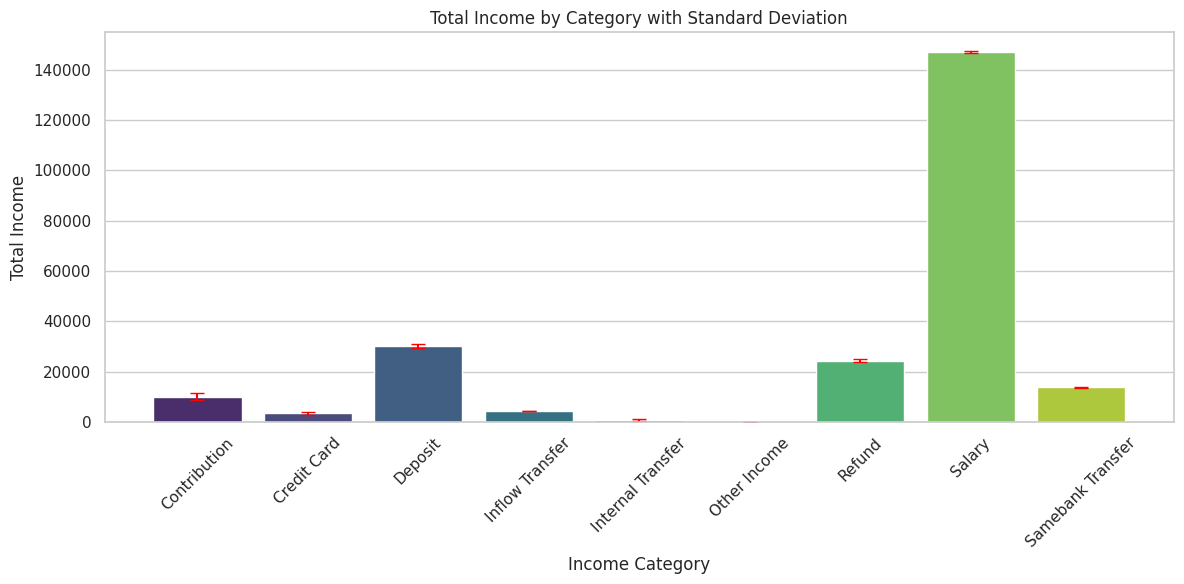

In [13]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='category', y='total_income', data=income_stats, palette='viridis', errorbar=None)
# Add error bars for standard deviation
bar_plot.errorbar(income_stats['category'], income_stats['total_income'], yerr=income_stats['std_income'], fmt='none', c='red', capsize=5)

# Customize the plot
plt.title('Total Income by Category with Standard Deviation')
plt.xlabel('Income Category')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Group by 'name' (income stream) and calculate metrics
debit_stats = debit_df.groupby('category').agg(
    total_income=('amount', 'sum'),
    mean_income=('amount', 'mean'),
    std_income=('amount', 'std'),
    count_income=('amount', 'count')
).reset_index()

debit_stats

,category,total_income,mean_income,std_income,count_income
0,Auto,-1948.44,-20.728085,20.043086,94
1,Entertainment,-3467.87,-21.017394,23.086595,165
2,Fees,-1970.38,-8.075328,46.041367,244
3,Grocery,-6204.05,-28.328995,43.134384,219
4,Health,-1717.60,-22.306494,14.917182,77
5,Home,-174.49,-58.163333,94.254947,3
6,Insurance,-1083.74,-49.260909,11.635718,22
7,Internal Transfer,-44377.81,-264.153631,480.808395,168
8,Other Expense,-31617.37,-95.233042,185.901758,332
9,Outflow Transfer,-102858.64,-137.695636,293.838789,747


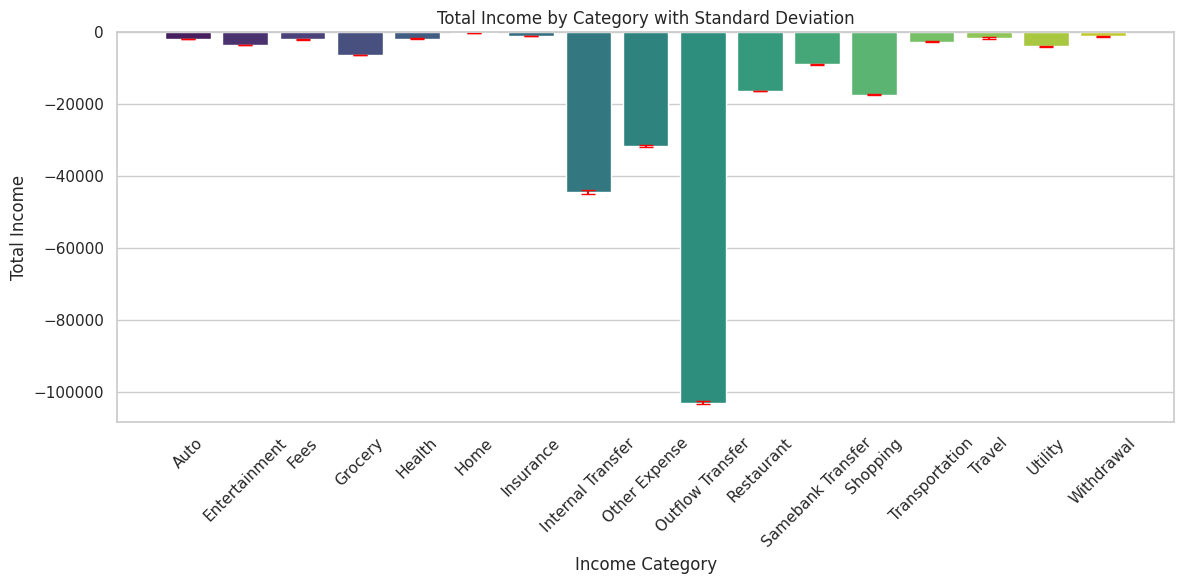

In [15]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='category', y='total_income', data=debit_stats, palette='viridis', errorbar=None)
# Add error bars for standard deviation
bar_plot.errorbar(debit_stats['category'], debit_stats['total_income'], yerr=debit_stats['std_income'], fmt='none', c='red', capsize=5)

# Customize the plot
plt.title('Total Income by Category with Standard Deviation')
plt.xlabel('Income Category')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
total_income = income_stats['total_income'].sum()
print("The total income is {}".format(total_income))
total_expenditure = debit_stats['total_income'].sum()
print("The total expenditure is {}".format(total_expenditure))
print("The Account Balance is {}".format( total_income + total_expenditure))

The total income is 234611.90999999997
The total expenditure is -246991.17
The Account Balance is -12379.260000000038


### Identify potential payroll deposits and other consistent income streams (not necessarily salary) based on the provided data. Demonstrate your analysis process for evaluating the consistency of income streams.

### ■ Hint: This could involve recognizing patterns in transaction names,consistency in amounts, or regularity of transaction dates.

### ○ Bonus: Evaluate the stability of each income stream and explain the metrics used in your analysis.

#### Get functions and data

In [21]:
income_df

,date,name,amount,balance,account_subtype,payment_meta,category
0,2019-12-13,new caps llc pr deposit ppd,377.64,403.22,checking,NaN,Salary
1,2019-12-13,online transfer from chk ...,200.00,-620.00,checking,NaN,Salary
2,2019-12-20,new caps llc pr deposit ppd,373.42,576.43,checking,NaN,Salary
3,2019-12-23,online transfer from chk ...,200.00,-420.00,checking,NaN,Salary
4,2019-12-23,atm cash deposit kentucky ave 2022-12-22,95.00,420.30,checking,ATM,Deposit
...,...,...,...,...,...,...,...
784,2024-03-26,online transfer from chk ...,600.00,353.02,checking,NaN,Salary
785,2024-03-27,online transfer from chk ...,12.00,0.00,checking,NaN,Refund
786,2024-04-01,remote online deposit,500.00,371.56,checking,NaN,Salary
787,2024-04-02,zelle payment from erik mcintyre,72.00,391.86,checking,NaN,Samebank Transfer


We Identify the potential payroll and other consistent income streamsdeposit by
  1. Looking for patterms in names column for names like "Payroll"
    - Perform an indepth analysis on the Payroll dataset to get more insight
  2. Checked the consistent by:
    - Making a dataframe for each distinct category
    - Obtained some important statistics for each category like the mean, standard deviation, and count using the function `category_stat`
    - For each category, transaction records where each unique combination of name and amount appears more than twice is obtained. Defined by the function `check_regular_intervals`important parameters like
        - the `amount` = determines the consistent amount paid
        - `count` = number of occurence
        - `is_regular` = identifies if the payment were made regularly
        - `interval_days` = what intervals these payments were made

    - Also, for each category we measure consistent payments that were made towards the end of the month (falls within the last three days of the month) using the function `check_month_end_regularities_by_name`. We obtained the following parameters
        - `Number of Months`	= Measures the number of payments that happened towards the end of the month
        - `longest_consecutive_months`	= calculates the length of the longest consistent months
        - `average_amount`	= Obtained the average amount paid
        - `consecutive_months` = Shows the consecutive months

  At the end we got the `Consistent_name_amount_dayInterval_df` dataframe which contains data that has a consistent income out and the interval in days.
  Also we got the `consistent_name_monthend` dataframe that measure the regularity of transaction towards the end of the month.

In [22]:
categories = income_df['category'].unique()
categories

array(['Salary', 'Deposit', 'Internal Transfer', 'Refund',
       'Samebank Transfer', 'Credit Card', 'Inflow Transfer',
       'Other Income', 'Contribution'], dtype=object)

In [23]:
Total_cat = []
for category in categories:
    x = income_df[income_df['category'].str.contains(category, case=False)]
    Total_cat.append(x)

In [24]:
salary_category = Total_cat[0].reset_index(drop = True)
Deposit_category = Total_cat[1].reset_index(drop = True)
Internal_transfer_category = Total_cat[2].reset_index(drop = True)
Refund_category = Total_cat[3].reset_index(drop = True)
Same_bank_transfer_category = Total_cat[4].reset_index(drop = True)
Credit_card_category = Total_cat[5].reset_index(drop = True)
Inflow_transfer_category = Total_cat[6].reset_index(drop = True)
Other_income_category = Total_cat[7].reset_index(drop = True)
Contribution_income_category = Total_cat[8].reset_index(drop = True)

In [25]:
salary_category['category'][0]

'Salary'

In [26]:
def category_stat(category):
    # Group by 'name' (income stream) and calculate metrics
    category_stats = category.groupby('name').agg(
        total_income=('amount', 'sum'),
        mean_income=('amount', 'mean'),
        std_income=('amount', 'std'),
        max_income=('amount', 'max'),
        min_income=('amount', 'min'),
        count_income=('amount', 'count')
        ).reset_index()
    # Add the 'category' column with the value 'Apple'
    category_stats['category'] = category['category'][0]
    # Get the counts that are greater than 1
    count_above_0ne = category_stats [category_stats ["count_income"] > 2].reset_index(drop = True)
    return category_stats, count_above_0ne

In [27]:
def check_regular_intervals(data):
    # Group by 'name' and 'amount', and filter for groups with more than 2 occurrences
    grouped_data = data.groupby(['name', 'amount']).filter(lambda x: len(x) > 2)

    # Initialize an empty list to store results
    results = []

    # Loop through each unique 'name' and 'amount' combination
    for (name, amount), group in grouped_data.groupby(['name', 'amount']):
        # Sort by 'date' and calculate time intervals between consecutive dates
        group = group.sort_values('date')
        date_intervals = group['date'].diff().dropna()  # Calculate date differences

        # Check if all intervals are the same (regular interval)
        is_regular = date_intervals.nunique() == 1
        interval_days = date_intervals.dt.days.iloc[0] if is_regular else None

        # Append the result to the list
        results.append({
            'name': name,
            'amount': amount,
            'count': len(group),
            'is_regular_interval': is_regular,
            'interval_days': interval_days
        })

    # Convert results to a DataFrame for easier readability
    results_df = pd.DataFrame(results)
    if 'amount' in results_df.columns:
      results_df = pd.DataFrame(results).sort_values(by='amount', ascending=False).reset_index(drop=True)
      results_df = results_df[results_df["is_regular_interval"] == True].reset_index(drop=True)
    else:
       print("Warning: No Matching deposits or income with regular time interval.")
       results_df = []
    return results_df

In [28]:
def check_month_end_regularities_by_name(data):
    # Ensure 'date' is a datetime column
    data['date'] = pd.to_datetime(data['date'])

    # Add a column to identify if the date falls within the last three days of the month
    data['is_month_end'] = ((data['date'] + pd.offsets.MonthEnd(0)) - data['date']).dt.days < 3

    # Group by 'name' and filter for groups with month-end dates
    grouped_data = data[data['is_month_end']].groupby('name').filter(lambda x: len(x) > 2)

    # Initialize an empty list to store results
    results = []

    # Loop through each unique 'name'
    for name, group in grouped_data.groupby('name'):
        # Sort by 'date' and filter only month-end dates
        group = group.sort_values('date')

        # Get unique month-end periods
        month_end_periods = group['date'].dt.to_period('M').unique()

        # Check for chronological sequences in month-end periods
        longest_sequence = []
        current_sequence = [month_end_periods[0]]

        for i in range(1, len(month_end_periods)):
            # If the current period is consecutive to the previous, add it to the sequence
            if (month_end_periods[i] - month_end_periods[i - 1]).n == 1:
                current_sequence.append(month_end_periods[i])
            else:
                # If the sequence breaks, compare lengths and reset the sequence
                if len(current_sequence) > len(longest_sequence):
                    longest_sequence = current_sequence
                current_sequence = [month_end_periods[i]]

        # Final check for the last sequence
        if len(current_sequence) > len(longest_sequence):
            longest_sequence = current_sequence

        # Calculate the average amount for this group
        avg_amount = group['amount'].mean()

        # Append the result to the list
        results.append({
            'name': name,
            'Number of Months': len(group),
            'longest_consecutive_months': len(longest_sequence),
            'average_amount': avg_amount,
            'consecutive_months': longest_sequence
        })

    # Convert results to a DataFrame for easier readability
    results_df = pd.DataFrame(results)
    if 'name' in results_df.columns:
        results_df = results_df.sort_values(by='Number of Months', ascending=False).reset_index(drop=True)
    else:
        print("Warning: No matching deposits or income with regular income during the end of the month.")
        results_df = []
    return results_df

In [29]:
def check_minimum_two_consecutive_months(data):
    # Ensure 'date' is a datetime column
    data['date'] = pd.to_datetime(data['date'])

    # Group by 'name' to focus on each unique name
    grouped_data = data.groupby('name').filter(lambda x: len(x) > 2)

    # Initialize an empty list to store results
    results = []

    # Loop through each unique 'name'
    for name, group in grouped_data.groupby('name'):
        # Sort by 'date' to ensure chronological order
        group = group.sort_values('date')

        # Get unique monthly periods
        month_periods = group['date'].dt.to_period('M').unique()

        # Check for at least two consecutive monthly periods
        consecutive_count = 0
        has_minimum_consecutive = False
        consecutive_months = []

        for i in range(1, len(month_periods)):
            # If the current period is consecutive to the previous, increment count
            if (month_periods[i] - month_periods[i - 1]).n == 1:
                if consecutive_count == 0:
                    consecutive_months = [month_periods[i - 1], month_periods[i]]
                else:
                    consecutive_months.append(month_periods[i])
                consecutive_count += 1
            else:
                # Reset count if the sequence breaks
                if consecutive_count >= 1:
                    has_minimum_consecutive = True
                    break
                consecutive_count = 0

        # Ensure we record if there was at least two consecutive months
        if consecutive_count >= 1:
            has_minimum_consecutive = True

        # Append only if there is a sequence of at least two consecutive months
        if has_minimum_consecutive:
            avg_amount = group['amount'].mean()
            results.append({
                'name': name,
                'count': len(group),
                'consecutive_months_count': len(consecutive_months),
                'average_amount': avg_amount,
                'consecutive_months': consecutive_months
            })

    # Convert results to a DataFrame for easier readability
    results_df = pd.DataFrame(results)
    if 'name' in results_df.columns:
        results_df = results_df.sort_values(by='count', ascending=False).reset_index(drop=True)
    else:
        print("Warning: No matching payments with a minimum of two consecutive months.")
        results_df = []
    return results_df

In [30]:
def group_by_name_amount(data):
    # Group by 'name' and 'amount' and calculate the count
    grouped_data = data.groupby(['name', 'amount']).size().reset_index(name='count')
    grouped_data_above_0ne = grouped_data[grouped_data ["count"] > 1].reset_index(drop = True)
    # Sort by 'count' in descending order
    grouped_data_above_0ne = grouped_data_above_0ne.sort_values(by='count', ascending=False).reset_index(drop=True)
    return grouped_data_above_0ne

In [31]:
def merger (x, y):
  # Merge the two DataFrames based on the 'name' column
  # Check if the first DataFrame is empty
  if not x.empty:
    # Merge the first two DataFrames on the 'name' column
    merged_df = pd.merge(x, y, on="name", how="left")
  else:
    merged_df = pd.DataFrame()
  #merged_df = merged_df.sort_values(by='count_income', ascending=False).reset_index(drop=True)
  return merged_df

In [32]:
def merger_ (x, y):
  # Merge the two DataFrames based on the 'name' column
  # Check if the first DataFrame is empty
  if not x.empty:
    # Merge the first two DataFrames on the 'name' column
    merged_df = pd.merge(x, y, on="name", how="outer")
  else:
    merged_df = pd.DataFrame()
  #merged_df = merged_df.sort_values(by='count_income', ascending=False).reset_index(drop=True)
  return merged_df

#### Payroll Category

In [17]:
def category_stat(df):
  # Create a new DataFrame grouped by 'category', summing and counting the 'amount'
  All_expense_stat = df.groupby('category').agg(
    total_amount=('amount', 'sum'),
    count=('amount', 'count'),
    std_expense=('amount', 'std'),
    mean_expense=('amount', 'mean'),
    max_expense=('amount', 'max'),
    min_expense=('amount', 'min')).reset_index()
  return All_expense_stat

In [18]:
income_category_stat = category_stat(income_df)
income_category_stat.sort_values(by='total_amount', ascending=True).reset_index(drop=True)
income_category_stat['percentage_income'] = (income_category_stat['total_amount'] / income_category_stat['total_amount'].sum()) * 100
income_category_stat.sort_values(by='percentage_income', ascending=False)

,category,total_amount,count,std_expense,mean_expense,max_expense,min_expense,percentage_income
7,Salary,147122.37,335,373.291848,439.171254,1950.00,0.01,62.708824
2,Deposit,30256.65,108,738.744047,280.154167,7110.00,1.04,12.896468
6,Refund,24375.02,129,561.718856,188.953643,5000.00,0.55,10.389507
8,Samebank Transfer,13817.57,138,127.369281,100.127319,693.00,1.09,5.889543
0,Contribution,10137.23,6,1404.387921,1689.538333,3759.85,121.19,4.320851
3,Inflow Transfer,4400.68,42,121.581175,104.778095,471.22,4.75,1.875727
1,Credit Card,3532.39,14,512.557374,252.313571,1971.71,49.00,1.505631
4,Internal Transfer,904.69,5,246.476277,180.938000,620.00,42.89,0.385611
5,Other Income,65.31,12,14.146210,5.442500,48.27,0.01,0.027837


Here majority of income comes in as Salary, accounting for over 62% of the total income.

In [19]:
#Identify consistent income streams (look for patterns in names like "Payroll")
payroll_df = income_df[income_df['name'].str.contains("Payroll", case=False)].reset_index(drop=True)
payroll_df

,date,name,amount,balance,account_subtype,payment_meta,category
0,2022-04-01,concord music ha payroll ppd,451.80,367.69,checking,NaN,Salary
1,2022-04-15,concord music ha payroll ppd,1164.47,1138.00,checking,NaN,Salary
2,2022-04-29,concord music ha payroll ppd,1164.47,184.30,checking,NaN,Salary
3,2022-05-13,concord music ha payroll ppd,900.00,667.74,checking,NaN,Salary
4,2022-05-27,concord music ha payroll ppd,900.00,444.53,checking,NaN,Salary
5,2022-06-10,concord music ha payroll ppd,900.00,1260.24,checking,NaN,Salary
6,2022-06-24,concord music ha payroll ppd,900.00,1183.63,checking,NaN,Salary
7,2022-07-08,concord music ha payroll ppd,900.00,927.79,checking,NaN,Salary
8,2022-07-22,concord music ha payroll ppd,900.00,1145.87,checking,NaN,Salary
9,2022-07-22,choice employer payroll ppd,64.32,1210.19,checking,NaN,Salary


In [35]:
# Consistent payroll
payroll_stat, payroll_stat_multiple = category_stat(payroll_df)
payroll_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,choice employer payroll ppd,418.43,59.775714,30.880489,94.78,0.84,7,Salary
1,concord music ha payroll ppd,11778.26,906.020000,200.311618,1164.47,451.80,13,Salary
2,the gauge collec payroll ppd,16047.00,1146.214286,420.129624,1950.00,466.00,14,Salary


In [34]:
Milli = check_minimum_two_consecutive_months(payroll_df)
consistent_payrolls = salary_merged_monthend_df = merger(Milli, payroll_stat_multiple)
consistent_payrolls

,name,count,consecutive_months_count,average_amount,consecutive_months,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,the gauge collec payroll ppd,14,12,1146.214286,"[2023-02, 2023-03, 2023-04, 2023-05, 2023-06, ...",16047.00,1146.214286,420.129624,1950.00,466.00,14,Salary
1,concord music ha payroll ppd,13,6,906.020000,"[2022-04, 2022-05, 2022-06, 2022-07, 2022-08, ...",11778.26,906.020000,200.311618,1164.47,451.80,13,Salary
2,choice employer payroll ppd,7,3,59.775714,"[2022-09, 2022-10, 2022-11]",418.43,59.775714,30.880489,94.78,0.84,7,Salary


#### Salary Category

In [36]:
salary_category

,date,name,amount,balance,account_subtype,payment_meta,category
0,2019-12-13,new caps llc pr deposit ppd,377.64,403.22,checking,NaN,Salary
1,2019-12-13,online transfer from chk ...,200.00,-620.00,checking,NaN,Salary
2,2019-12-20,new caps llc pr deposit ppd,373.42,576.43,checking,NaN,Salary
3,2019-12-23,online transfer from chk ...,200.00,-420.00,checking,NaN,Salary
4,2019-12-30,online transfer from chk ...,620.00,100.00,checking,NaN,Salary
...,...,...,...,...,...,...,...
330,2024-03-13,the gauge collec payroll ppd,1427.20,1164.58,checking,NaN,Salary
331,2024-03-14,remote online deposit,600.00,626.23,checking,NaN,Salary
332,2024-03-26,online transfer from chk ...,600.00,353.02,checking,NaN,Salary
333,2024-04-01,remote online deposit,500.00,371.56,checking,NaN,Salary


In [37]:
salary_category_stat, salary_category_stat_multiple = category_stat(salary_category)
#salary_category_stat_multiple

In [38]:
# Usage
regular_intervals_df = check_regular_intervals(salary_category)
regular_month_end_by_name_df = check_month_end_regularities_by_name(salary_category)
regular_intervals_df

,name,amount,count,is_regular_interval,interval_days
0,concord music ha payroll ppd,900.00,8,True,14.0
1,remote online deposit,407.91,3,True,7.0


In [39]:
# Usage
regular_month_end_by_name_df

,name,Number of Months,longest_consecutive_months,average_amount,consecutive_months
0,online transfer from chk ...,10,2,402.000,"[2020-07, 2020-08]"
1,online transfer from sav ...,5,2,420.002,"[2020-08, 2020-09]"


In [40]:
salary_merged_df = merger(regular_intervals_df, salary_category_stat_multiple)
salary_merged_monthend_df = merger(regular_month_end_by_name_df, salary_category_stat_multiple)
salary_merged_df

,name,amount,count,is_regular_interval,interval_days,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,concord music ha payroll ppd,900.00,8,True,14.0,11778.26,906.020000,200.311618,1164.47,451.8,13,Salary
1,remote online deposit,407.91,3,True,7.0,17899.43,458.959744,119.469486,600.00,200.0,39,Salary


In [41]:
salary_merged_monthend_df

,name,Number of Months,longest_consecutive_months,average_amount,consecutive_months,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,online transfer from chk ...,10,2,402.000,"[2020-07, 2020-08]",20866.26,366.074737,304.047031,1100.0,100.00,57,Salary
1,online transfer from sav ...,5,2,420.002,"[2020-08, 2020-09]",7030.85,390.602778,176.672080,700.0,113.88,18,Salary


In [42]:
# Concatenate DataFrames
salary_final_df = pd.concat([salary_merged_df, salary_merged_monthend_df], ignore_index=True)
salary_final_df

,name,amount,count,is_regular_interval,interval_days,total_income,mean_income,std_income,max_income,min_income,count_income,category,Number of Months,longest_consecutive_months,average_amount,consecutive_months
0,concord music ha payroll ppd,900.00,8.0,True,14.0,11778.26,906.020000,200.311618,1164.47,451.80,13,Salary,NaN,NaN,NaN,NaN
1,remote online deposit,407.91,3.0,True,7.0,17899.43,458.959744,119.469486,600.00,200.00,39,Salary,NaN,NaN,NaN,NaN
2,online transfer from chk ...,NaN,NaN,NaN,NaN,20866.26,366.074737,304.047031,1100.00,100.00,57,Salary,10.0,2.0,402.000,"[2020-07, 2020-08]"
3,online transfer from sav ...,NaN,NaN,NaN,NaN,7030.85,390.602778,176.672080,700.00,113.88,18,Salary,5.0,2.0,420.002,"[2020-08, 2020-09]"


#### Deposit Category

In [43]:
#Deposit_category

In [44]:
deposit_category_stat, deposit_category_stat_multiple = category_stat(Deposit_category)
deposit_category_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,deposit id number,1320.00,330.000000,473.990155,1040.0,60.00,4,Deposit
1,remote online deposit,4021.75,287.267857,426.847781,1500.0,26.99,14,Deposit


In [45]:
# Usage
regular_intervals_df = check_regular_intervals(Deposit_category)
regular_month_end_by_name_df = check_month_end_regularities_by_name(Deposit_category)
regular_intervals_df

[]

In [46]:
# Usage
regular_month_end_by_name_df

[]

#### Internal Transfer_Category

In [47]:
Internal_transfer_category

,date,name,amount,balance,account_subtype,payment_meta,category
0,2019-12-30,square inc cash app ccd,620.00,826.49,checking,Square,Internal Transfer
1,2020-01-17,square inc cash app ccd,75.00,347.80,checking,Square,Internal Transfer
2,2022-10-28,mcintyre cheyen san jose ca 2023-10-28,104.84,-169.40,checking,PayPal,Internal Transfer
3,2022-11-15,mcintyre cheyen san jose ca 2023-11-15,61.96,-1409.43,checking,PayPal,Internal Transfer
4,2022-11-15,mcintyre cheyen san jose ca 2023-11-15,42.89,-1366.54,checking,PayPal,Internal Transfer


In [48]:
Internal_transfer_category_stat, Internal_transfer_category_stat_multiple = category_stat(Internal_transfer_category)
Internal_transfer_category_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category


#### Refund Category

In [49]:
Refund_category_stat, Refund_category_stat_multiple = category_stat(Refund_category)
Refund_category_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,edcvegas tx 2022-03-18,252.44,42.073333,15.668357,48.74,10.11,6,Refund
1,online transfer from chk ...,4927.15,75.802308,199.754618,1500.00,3.39,65,Refund
2,online transfer from chk ... 2023-11-24,1784.00,297.333333,428.996348,1150.00,50.00,6,Refund
3,online transfer from sav ...,10729.70,397.396296,984.794628,5000.00,0.55,27,Refund
4,online transfer from sav ... 2023-11-24,585.00,117.000000,147.207337,375.00,20.00,5,Refund


In [50]:
regular_intervals_df = check_regular_intervals(Refund_category)
refund_merged_df = merger(regular_intervals_df, Refund_category_stat_multiple)
refund_merged_df

,name,amount,count,is_regular_interval,interval_days,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,edcvegas tx 2022-03-18,48.74,4,True,0.0,252.44,42.073333,15.668357,48.74,10.11,6,Refund


In [51]:
# Usage
regular_month_end_by_name_df = check_month_end_regularities_by_name(Refund_category)
refund_merged_monthend_df = merger(regular_month_end_by_name_df, Refund_category_stat_multiple)
refund_merged_monthend_df

,name,Number of Months,longest_consecutive_months,average_amount,consecutive_months,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,online transfer from chk ...,9,3,31.333333,"[2023-12, 2024-01, 2024-02]",4927.15,75.802308,199.754618,1500.0,3.39,65,Refund
1,online transfer from sav ...,4,1,18.125000,[2020-09],10729.70,397.396296,984.794628,5000.0,0.55,27,Refund


In [52]:
# Concatenate DataFrames
Refund_final_df = pd.concat([refund_merged_df, refund_merged_monthend_df], ignore_index=True)
Refund_final_df

,name,amount,count,is_regular_interval,interval_days,total_income,mean_income,std_income,max_income,min_income,count_income,category,Number of Months,longest_consecutive_months,average_amount,consecutive_months
0,edcvegas tx 2022-03-18,48.74,4.0,True,0.0,252.44,42.073333,15.668357,48.74,10.11,6,Refund,NaN,NaN,NaN,NaN
1,online transfer from chk ...,NaN,NaN,NaN,NaN,4927.15,75.802308,199.754618,1500.00,3.39,65,Refund,9.0,3.0,31.333333,"[2023-12, 2024-01, 2024-02]"
2,online transfer from sav ...,NaN,NaN,NaN,NaN,10729.70,397.396296,984.794628,5000.00,0.55,27,Refund,4.0,1.0,18.125000,[2020-09]


#### Same Bank Transfer Category

In [53]:
Same_bank_transfer_category[Same_bank_transfer_category["name"] == "zelle payment from drew t kirby" ]

,date,name,amount,balance,account_subtype,payment_meta,category
84,2022-04-19,zelle payment from drew t kirby,45.0,-985.67,checking,NaN,Samebank Transfer
107,2022-09-28,zelle payment from drew t kirby,400.0,833.10,checking,NaN,Samebank Transfer
108,2022-09-28,zelle payment from drew t kirby,310.0,433.10,checking,NaN,Samebank Transfer
109,2022-09-30,zelle payment from drew t kirby,310.0,327.99,checking,NaN,Samebank Transfer
120,2022-11-14,zelle payment from drew t kirby,45.0,110.32,checking,NaN,Samebank Transfer
125,2022-12-07,zelle payment from drew t kirby,45.0,108.98,checking,NaN,Samebank Transfer
136,2024-01-02,zelle payment from drew t kirby,60.0,39.79,checking,NaN,Samebank Transfer


In [54]:
Same_bank_transfer_category_stat, Same_bank_transfer_category_stat_multiple = category_stat(Same_bank_transfer_category)
Same_bank_transfer_category_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,quickpay with zelle payment from meaghan mcintyre,2811.44,70.286000,139.249764,693.0,1.09,40,Samebank Transfer
1,zelle payment from anthony chase rodriguez,1404.72,108.055385,129.091487,315.0,10.00,13,Samebank Transfer
2,zelle payment from brody pickering,818.69,90.965556,27.803070,140.0,39.00,9,Samebank Transfer
3,zelle payment from cheyenne mcintyre,822.92,82.292000,71.965558,200.0,3.23,10,Samebank Transfer
4,zelle payment from drew t kirby,1215.00,173.571429,158.632549,400.0,45.00,7,Samebank Transfer
5,zelle payment from erik n mcintyre,963.00,137.571429,81.412237,200.0,20.00,7,Samebank Transfer
6,zelle payment from meaghan mcintyre,2840.13,118.338750,135.328846,400.0,3.50,24,Samebank Transfer
7,zelle payment from sydnea blair,768.00,69.818182,81.849640,240.0,5.00,11,Samebank Transfer


In [55]:
regular_intervals_df = check_regular_intervals(Same_bank_transfer_category)
same_bank_merged_df = merger(regular_intervals_df, Same_bank_transfer_category_stat_multiple)
same_bank_merged_df

""


In [56]:
# Usage
regular_month_end_by_name_df = check_month_end_regularities_by_name(Same_bank_transfer_category)
same_bank_merged_monthend_df = merger(regular_month_end_by_name_df, Same_bank_transfer_category_stat_multiple)
same_bank_merged_monthend_df

,name,Number of Months,longest_consecutive_months,average_amount,consecutive_months,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,quickpay with zelle payment from meaghan mcintyre,12,4,53.774167,"[2020-07, 2020-08, 2020-09, 2020-10]",2811.44,70.286000,139.249764,693.0,1.09,40,Samebank Transfer
1,zelle payment from meaghan mcintyre,5,3,147.600000,"[2021-10, 2021-11, 2021-12]",2840.13,118.338750,135.328846,400.0,3.50,24,Samebank Transfer
2,zelle payment from erik n mcintyre,4,3,155.000000,"[2021-11, 2021-12, 2022-01]",963.00,137.571429,81.412237,200.0,20.00,7,Samebank Transfer
3,zelle payment from anthony chase rodriguez,3,1,227.333333,[2021-04],1404.72,108.055385,129.091487,315.0,10.00,13,Samebank Transfer
4,zelle payment from drew t kirby,3,1,340.000000,[2022-09],1215.00,173.571429,158.632549,400.0,45.00,7,Samebank Transfer


In [57]:
# Concatenate DataFrames
same_bank_final_df = pd.concat([same_bank_merged_df, same_bank_merged_monthend_df], ignore_index=True)
same_bank_final_df

,name,Number of Months,longest_consecutive_months,average_amount,consecutive_months,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,quickpay with zelle payment from meaghan mcintyre,12,4,53.774167,"[2020-07, 2020-08, 2020-09, 2020-10]",2811.44,70.286000,139.249764,693.0,1.09,40,Samebank Transfer
1,zelle payment from meaghan mcintyre,5,3,147.600000,"[2021-10, 2021-11, 2021-12]",2840.13,118.338750,135.328846,400.0,3.50,24,Samebank Transfer
2,zelle payment from erik n mcintyre,4,3,155.000000,"[2021-11, 2021-12, 2022-01]",963.00,137.571429,81.412237,200.0,20.00,7,Samebank Transfer
3,zelle payment from anthony chase rodriguez,3,1,227.333333,[2021-04],1404.72,108.055385,129.091487,315.0,10.00,13,Samebank Transfer
4,zelle payment from drew t kirby,3,1,340.000000,[2022-09],1215.00,173.571429,158.632549,400.0,45.00,7,Samebank Transfer


#### Credit Card category

In [58]:
credit_card_category_stat, credit_card_category_stat_multiple = category_stat(Credit_card_category)
credit_card_category_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,payment thank you-mobile,3532.39,252.313571,512.557374,1971.71,49.0,14,Credit Card


In [59]:
regular_intervals_df = check_regular_intervals(Credit_card_category)
#Credit_card_merged_df = merger(regular_intervals_df, credit_card_category_stat_multiple)
regular_intervals_df
#Credit_card_merged_df

[]

In [60]:
# Usage
regular_month_end_by_name_df = check_month_end_regularities_by_name(Credit_card_category)
#Credit_card_merged_monthend_df = merger(regular_month_end_by_name_df, credit_card_category_stat_multiple)
regular_month_end_by_name_df
#Credit_card_merged_monthend_df

[]

#### Inflow transfer category

In [61]:
Inflow_transfer_category_stat, Inflow_transfer_category_stat_multiple = category_stat(Inflow_transfer_category)
Inflow_transfer_category_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,real time transfer recd from paypal,964.54,192.908000,223.621819,471.22,24.75,5,Inflow Transfer
1,venmo,3116.37,89.039143,101.478198,394.00,4.75,35,Inflow Transfer


In [62]:
regular_intervals_df = check_regular_intervals(Inflow_transfer_category)
#same_bank_merged_df = merger(regular_intervals_df, Same_bank_transfer_category_stat_multiple)
regular_intervals_df

[]

In [63]:
regular_month_end_by_name_df = check_month_end_regularities_by_name(Inflow_transfer_category)
Inflow_merged_monthend_df = merger(regular_month_end_by_name_df, Inflow_transfer_category_stat_multiple)
Inflow_merged_monthend_df

,name,Number of Months,longest_consecutive_months,average_amount,consecutive_months,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,venmo,7,1,73.597143,[2020-07],3116.37,89.039143,101.478198,394.0,4.75,35,Inflow Transfer


In [64]:
# Concatenate DataFrames
# Inflow_final_df = pd.concat([Inflow_merged_df, Inflow_merged_monthend_df], ignore_index=True)
Inflow_final_df = Inflow_merged_monthend_df
Inflow_final_df

,name,Number of Months,longest_consecutive_months,average_amount,consecutive_months,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,venmo,7,1,73.597143,[2020-07],3116.37,89.039143,101.478198,394.0,4.75,35,Inflow Transfer


#### Other Income

In [65]:
Other_income_category

,date,name,amount,balance,account_subtype,payment_meta,category
0,2020-07-23,interest payment,0.05,1100.00,savings,NaN,Other Income
1,2020-08-25,interest payment,0.08,900.08,savings,NaN,Other Income
2,2020-09-24,interest payment,0.03,1009.53,savings,NaN,Other Income
3,2021-01-14,bill.com verify ccd,0.01,507.41,checking,NaN,Other Income
4,2021-01-14,bill.com verify ppd,0.01,507.40,checking,NaN,Other Income
5,2021-03-23,interest payment,0.01,300.01,savings,NaN,Other Income
6,2021-04-23,interest payment,0.02,1200.00,savings,NaN,Other Income
7,2021-05-25,interest payment,0.01,600.00,savings,NaN,Other Income
8,2021-11-30,katie davis in 2022-11-29,15.00,1542.02,checking,Charities and Non-Profits,Other Income
9,2023-02-02,httpswww.airs ma 2023-02-01,0.74,-1135.11,checking,NaN,Other Income


In [66]:
Other_income_category_stat, Other_income_category_stat_multiple = category_stat(Other_income_category)
Other_income_category_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,interest payment,0.2,0.033333,0.027325,0.08,0.01,6,Other Income


In [67]:
regular_intervals_df = check_regular_intervals(Other_income_category)
regular_intervals_df

[]

In [68]:
regular_month_end_by_name_df = check_month_end_regularities_by_name(Other_income_category)
regular_month_end_by_name_df

[]

#### Contribution Income

In [69]:
Contribution_income_category

,date,name,amount,balance,account_subtype,payment_meta,category
0,2023-01-23,western union,121.19,-201.92,checking,NaN,Contribution
1,2023-01-31,western union,726.77,481.73,checking,NaN,Contribution
2,2023-04-17,fedwire credit barclays bank cheyenne mcintyre...,2439.49,2589.94,checking,NaN,Contribution
3,2023-04-18,western union,2435.04,3480.08,checking,NaN,Contribution
4,2023-04-20,fedwire credit barclays bank cheyenne mcintyre...,654.89,423.32,checking,NaN,Contribution
5,2023-06-16,western union,3759.85,3796.66,checking,NaN,Contribution


In [70]:
Contribution_income_stat, Contribution_income_stat_multiple = category_stat(Contribution_income_category)
Contribution_income_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,western union,7042.85,1760.7125,1654.120052,3759.85,121.19,4,Contribution


In [71]:
regular_intervals_df = check_regular_intervals(Contribution_income_category)
regular_intervals_df

[]

In [72]:
regular_month_end_by_name_df = check_month_end_regularities_by_name(Contribution_income_category)
regular_month_end_by_name_df

[]

#### Getting it together

In [ ]:
# Consistent payroll
consistent_payrolls

,name,count,consecutive_months_count,average_amount,consecutive_months,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,the gauge collec payroll ppd,14,12,1146.214286,"[2023-02, 2023-03, 2023-04, 2023-05, 2023-06, ...",16047.00,1146.214286,420.129624,1950.00,466.00,14,Salary
1,concord music ha payroll ppd,13,6,906.020000,"[2022-04, 2022-05, 2022-06, 2022-07, 2022-08, ...",11778.26,906.020000,200.311618,1164.47,451.80,13,Salary
2,choice employer payroll ppd,7,3,59.775714,"[2022-09, 2022-10, 2022-11]",418.43,59.775714,30.880489,94.78,0.84,7,Salary


In [ ]:
# Concatenate all dataframes along the rows
Consistent_name_amount_dayInterval_df = pd.concat([salary_merged_df, refund_merged_df, ], axis=0, join='outer', ignore_index=True)
Consistent_name_amount_dayInterval_df

,name,amount,count,is_regular_interval,interval_days,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,concord music ha payroll ppd,900.00,8,True,14.0,11778.26,906.020000,200.311618,1164.47,451.80,13,Salary
1,remote online deposit,407.91,3,True,7.0,17899.43,458.959744,119.469486,600.00,200.00,39,Salary
2,edcvegas tx 2022-03-18,48.74,4,True,0.0,252.44,42.073333,15.668357,48.74,10.11,6,Refund


In [ ]:
# Concatenate all dataframes along the rows
consistent_name_monthend = pd.concat([salary_merged_monthend_df, refund_merged_monthend_df, same_bank_merged_monthend_df, Inflow_merged_monthend_df ], axis=0, join='outer', ignore_index=True)
consistent_name_monthend

,name,Number of Months,longest_consecutive_months,average_amount,consecutive_months,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,online transfer from chk ...,10,2,402.000000,"[2020-07, 2020-08]",20866.26,366.074737,304.047031,1100.0,100.00,57,Salary
1,online transfer from sav ...,5,2,420.002000,"[2020-08, 2020-09]",7030.85,390.602778,176.672080,700.0,113.88,18,Salary
2,online transfer from chk ...,9,3,31.333333,"[2023-12, 2024-01, 2024-02]",4927.15,75.802308,199.754618,1500.0,3.39,65,Refund
3,online transfer from sav ...,4,1,18.125000,[2020-09],10729.70,397.396296,984.794628,5000.0,0.55,27,Refund
4,quickpay with zelle payment from meaghan mcintyre,12,4,53.774167,"[2020-07, 2020-08, 2020-09, 2020-10]",2811.44,70.286000,139.249764,693.0,1.09,40,Samebank Transfer
5,zelle payment from meaghan mcintyre,5,3,147.600000,"[2021-10, 2021-11, 2021-12]",2840.13,118.338750,135.328846,400.0,3.50,24,Samebank Transfer
6,zelle payment from erik n mcintyre,4,3,155.000000,"[2021-11, 2021-12, 2022-01]",963.00,137.571429,81.412237,200.0,20.00,7,Samebank Transfer
7,zelle payment from anthony chase rodriguez,3,1,227.333333,[2021-04],1404.72,108.055385,129.091487,315.0,10.00,13,Samebank Transfer
8,zelle payment from drew t kirby,3,1,340.000000,[2022-09],1215.00,173.571429,158.632549,400.0,45.00,7,Samebank Transfer
9,venmo,7,1,73.597143,[2020-07],3116.37,89.039143,101.478198,394.0,4.75,35,Inflow Transfer


In [ ]:
# Rename columns in consistent_name_monthend to match
consistent_name_monthend = consistent_name_monthend.rename(columns={'Number of Months': 'count', 'average_amount': 'amount'})
consistent_payrolls = consistent_payrolls.rename(columns={'average_amount': 'amount'})

In [ ]:
common_columns = ['name', 'count', 'amount', 'total_income', 'mean_income', 'max_income',	'min_income',	'std_income', 'count_income', 'category']
consistent_payrolls[common_columns]

,name,count,amount,total_income,mean_income,max_income,min_income,std_income,count_income,category
0,the gauge collec payroll ppd,14,1146.214286,16047.00,1146.214286,1950.00,466.00,420.129624,14,Salary
1,concord music ha payroll ppd,13,906.020000,11778.26,906.020000,1164.47,451.80,200.311618,13,Salary
2,choice employer payroll ppd,7,59.775714,418.43,59.775714,94.78,0.84,30.880489,7,Salary


In [ ]:
# Concatenate all dataframes along the rows
combined_df = pd.concat([consistent_name_monthend[common_columns], Consistent_name_amount_dayInterval_df[common_columns], consistent_payrolls[common_columns]], axis=0, join='outer', ignore_index=True)
# Sort by 'count' in descending order
combined_df = combined_df.sort_values(by='count', ascending=False).reset_index(drop=True)
combined_df

,name,count,amount,total_income,mean_income,max_income,min_income,std_income,count_income,category
0,the gauge collec payroll ppd,14,1146.214286,16047.00,1146.214286,1950.00,466.00,420.129624,14,Salary
1,concord music ha payroll ppd,13,906.020000,11778.26,906.020000,1164.47,451.80,200.311618,13,Salary
2,quickpay with zelle payment from meaghan mcintyre,12,53.774167,2811.44,70.286000,693.00,1.09,139.249764,40,Samebank Transfer
3,online transfer from chk ...,10,402.000000,20866.26,366.074737,1100.00,100.00,304.047031,57,Salary
4,online transfer from chk ...,9,31.333333,4927.15,75.802308,1500.00,3.39,199.754618,65,Refund
5,concord music ha payroll ppd,8,900.000000,11778.26,906.020000,1164.47,451.80,200.311618,13,Salary
6,venmo,7,73.597143,3116.37,89.039143,394.00,4.75,101.478198,35,Inflow Transfer
7,choice employer payroll ppd,7,59.775714,418.43,59.775714,94.78,0.84,30.880489,7,Salary
8,online transfer from sav ...,5,420.002000,7030.85,390.602778,700.00,113.88,176.672080,18,Salary
9,zelle payment from meaghan mcintyre,5,147.600000,2840.13,118.338750,400.00,3.50,135.328846,24,Samebank Transfer


In [ ]:
# Evaluate Stability
def evaluate_stability(data):
    # Calculate stability score based on std_income and count
    data['stability_score'] = data['count'] / (1 + data['std_income'])
    # Evaluate Stability with explanation
    for index, row in data.iterrows():
        print(f"Income Stream: {row['name']}")
        print(f"  - Frequency of Transactions (Count): {row['count']}")
        print(f"  - Average Amount (Mean Income): {row['mean_income']}")
        print(f"  - Total Income: {row['total_income']}")
        print(f"  - Income Volatility (Std Dev): {row['std_income']}")
        print(f"  - Income Range (Max - Min): {row['max_income']- row['min_income']}")
        print(f"  - Stability Score: {row['stability_score']:.2f}")
        print(f"  - Category: {row['category']}")
        print("")

    return data

In [ ]:
# Run the stability evaluation
stability_analysis = evaluate_stability(combined_df)
# Display the resulting DataFrame sorted by stability score
stability_analysis.sort_values(by='stability_score', ascending=False, inplace=True)
stability_analysis.reset_index(drop=True, inplace=True)

Income Stream: the gauge collec payroll ppd
  - Frequency of Transactions (Count): 14
  - Average Amount (Mean Income): 1146.2142857142858
  - Total Income: 16047.0
  - Income Volatility (Std Dev): 420.12962442403574
  - Income Range (Max - Min): 1484.0
  - Stability Score: 0.03
  - Category: Salary

Income Stream: concord music ha payroll ppd
  - Frequency of Transactions (Count): 13
  - Average Amount (Mean Income): 906.02
  - Total Income: 11778.26
  - Income Volatility (Std Dev): 200.31161802717952
  - Income Range (Max - Min): 712.6700000000001
  - Stability Score: 0.06
  - Category: Salary

Income Stream: quickpay with zelle payment from meaghan mcintyre
  - Frequency of Transactions (Count): 12
  - Average Amount (Mean Income): 70.286
  - Total Income: 2811.44
  - Income Volatility (Std Dev): 139.24976429202536
  - Income Range (Max - Min): 691.91
  - Stability Score: 0.09
  - Category: Samebank Transfer

Income Stream: online transfer from chk ...
  - Frequency of Transactions 

In [ ]:
# Display the resulting DataFrame sorted by stability score
stability_analysis

,name,count,amount,total_income,mean_income,std_income,count_income,category,stability_score
0,edcvegas tx 2022-03-18,4,48.740000,252.44,42.073333,15.668357,6,Refund,0.239976
1,choice employer payroll ppd,7,59.775714,418.43,59.775714,30.880489,7,Salary,0.219570
2,quickpay with zelle payment from meaghan mcintyre,12,53.774167,2811.44,70.286000,139.249764,40,Samebank Transfer,0.085562
3,venmo,7,73.597143,3116.37,89.039143,101.478198,35,Inflow Transfer,0.068307
4,concord music ha payroll ppd,13,906.020000,11778.26,906.020000,200.311618,13,Salary,0.064577
5,zelle payment from erik n mcintyre,4,155.000000,963.00,137.571429,81.412237,7,Samebank Transfer,0.048536
6,online transfer from chk ...,9,31.333333,4927.15,75.802308,199.754618,65,Refund,0.044831
7,concord music ha payroll ppd,8,900.000000,11778.26,906.020000,200.311618,13,Salary,0.039739
8,zelle payment from meaghan mcintyre,5,147.600000,2840.13,118.338750,135.328846,24,Samebank Transfer,0.036676
9,the gauge collec payroll ppd,14,1146.214286,16047.00,1146.214286,420.129624,14,Salary,0.033244


### **Summary of the Stability Score Calculation:**

**Formula:**

                  stability_score = count / (1 + std_income)
### **1. Components:**

**Count:**

Indicates the frequency of transactions for an income stream; higher counts suggest more stability.

**Standard Deviation (std_income):**

Measures the variability in transaction amounts; lower standard deviations indicate more consistent income.

### **2. Purpose:**

**Prioritizes Frequency:**

A higher transaction count improves the stability score, reflecting a more reliable income stream.

**Incorporates Volatility:**

The denominator (1 + std_income) reduces the stability score as variability increases, indicating that higher fluctuations in amounts signal less stability.

### **3. Interpretation:**

**Higher Score:**

Indicates a more stable income stream due to high frequency and low variability.

**Lower Score:**

Indicates instability, resulting from either low frequency or high variability in transaction amounts.

## Question 2

2. Expense Categorization:

  ○ Identify and categorize recurring expenses to assess the applicant’s
financial behavior.

  ○ Recognize potential patterns in spending, such as rent, utility bills, service
payments, loan obligations, or regular transfers/withdrawals.

  ○ Evaluate the consistency and regularity of expenses, and summarize
monthly obligations across different periods.

  ○ Bonus: Differentiate between essential expenses (e.g., housing, utilities)
and non-essential spending (e.g., dining out, entertainment). Assess the
applicant’s financial habits, such as whether they tend to be a saver or a
spender.

#### Identify and categorize recurring expenses to assess the applicants financial behavior.

In [94]:
expense_df = df[df['amount'] < 0]

In [95]:
len(expense_df)

3813

In [102]:
expense_stat, expense_stat_multiple = category_stat(expense_df)
# Calculate percentage of total spending for each category
expense_stat

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,#smoke shop indianapolis in 01/11,-26.75,-26.750,NaN,-26.75,-26.75,1,Shopping
1,#smoke shop indianapolis in 02/09,-32.10,-32.100,NaN,-32.10,-32.10,1,Shopping
2,0772 pf plntf holding indianapolis in 03/08,-4.21,-2.105,1.562706,-1.00,-3.21,2,Shopping
3,0772 pf plntf holding indianapolis in 03/09,-3.75,-3.750,NaN,-3.75,-3.75,1,Shopping
4,0772 pf plntf holding indianapolis in 09/16,-3.21,-3.210,NaN,-3.21,-3.21,1,Shopping
...,...,...,...,...,...,...,...,...
2470,zenith music managem nc 06/07,-36.57,-36.570,NaN,-36.57,-36.57,1,Shopping
2471,zettle_*crisis uk london 10/24 pound sterl18.1...,-22.19,-22.190,NaN,-22.19,-22.19,1,Shopping
2472,zettle_*hackney market london 09/12 pound ster...,-5.01,-5.010,NaN,-5.01,-5.01,1,Shopping
2473,zsk*ce tilt studio pos rockford il 02/15,-64.73,-64.730,NaN,-64.73,-64.73,1,Shopping


In [103]:
expense_stat_multiple

,name,total_income,mean_income,std_income,max_income,min_income,count_income,category
0,7-eleven,-92.75,-5.796875,2.865705,-1.53,-12.42,16,Shopping
1,affirm.com payments affirm.com ca 02/26,-41.53,-13.843333,3.875001,-9.97,-17.72,3,Shopping
2,affirm.com payments affirm.com ca 02/27,-70.07,-14.014000,3.392710,-9.97,-17.72,5,Shopping
3,afterpay ca 12/02,-153.87,-38.467500,4.656332,-34.43,-42.50,4,Shopping
4,amazing lash studio lin,-808.95,-80.895000,46.808962,-10.00,-139.99,10,Shopping
...,...,...,...,...,...,...,...,...
87,urban outfitters,-63.52,-21.173333,2.077603,-19.65,-23.54,3,Shopping
88,venmo,-5511.05,-88.887903,116.157084,-0.01,-475.00,62,Shopping
89,walgreens,-513.78,-17.716552,11.544726,-0.48,-39.12,29,Shopping
90,walmart,-791.80,-21.994444,23.483320,-0.34,-137.54,36,Shopping


From here we can see that the applicant's spent more than 41% on outflow transfer category and about 18% on Internal transfer

In [104]:
def plot_expense_statistics(df):
    # Set the aesthetics for the plots
    sns.set(style="whitegrid")
    figsize = (18, 6)  # Set the same width and height for all plots

    # Plot 1: Bar plot of total amount by category
    plt.figure(figsize=figsize)
    sns.barplot(data=df, x='total_amount', y='category', hue='category', palette='viridis', orient='h', dodge=False)
    plt.title('Total Amount Spent by Category')
    plt.xlabel('Total Amount')
    plt.ylabel('Category')
    plt.axvline(0, color='grey', linestyle='--')  # Vertical line at x=0
    plt.legend([],[], frameon=False)  # Remove legend
    plt.show()

    # Plot 2: Box plot of mean expense by category
    plt.figure(figsize=figsize)
    sns.boxplot(data=df, x='mean_expense', y='category', palette='coolwarm')
    plt.title('Distribution of Mean Expense by Category')
    plt.xlabel('Mean Expense')
    plt.ylabel('Category')
    plt.axvline(0, color='grey', linestyle='--')  # Vertical line at x=0
    plt.show()

    # Plot 3: Scatter plot of total amount vs. count
    plt.figure(figsize=figsize)
    sns.scatterplot(
        data=df,
        x='count',
        y='total_amount',
        hue='category',
        palette='Set2',
        size='count',
        sizes=(150, 900),
        legend='brief',
        alpha=0.7  # Reduce overlap with transparency
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)  # Legend outside plot
    plt.title('Total Amount vs. Number of Transactions by Category')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Total Amount')
    plt.axhline(0, color='grey', linestyle='--')  # Horizontal line at y=0
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout for extra legend space
    plt.show()

In [108]:
# Call the function with your dataframe
#plot_expense_statistics(expense_stat_multiple)

In [106]:
expense_df.head()

,date,name,amount,balance,account_subtype,payment_meta,category,net_cash_flow
0,2019-12-09,7-eleven,-1.53,269.33,checking,NaN,Shopping,-482.57
1,2019-12-09,parkingmeter1 877242790 chicago il 12/07,-2.33,280.12,checking,NaN,Transportation,-482.57
2,2019-12-09,parkingmeter1 877242790 chicago il 12/08,-3.26,282.45,checking,NaN,Transportation,-482.57
3,2019-12-09,mcdonald's,-9.26,270.86,checking,Fast Food,Restaurant,-482.57
4,2019-12-09,quickpay with zelle payment to josiah jpm30152...,-20.00,285.71,checking,Chase QuickPay,Samebank Transfer,-482.57


In [109]:
# Define the regex pattern
pattern = re.compile(r'(^[A-Za-z]+(?:\s[A-Za-z]+){0,2}(?=\s\d|\b))|(^\d[\w/-]*(?:\s\w+){0,2})')

# Function to extract pattern from 'name' column
def extract_pattern(text):
    match = pattern.search(text)
    return match.group(0) if match else text  # If no match, return original text

In [110]:
# Create a new column 'pattern' to store the extracted patterns
expense_df['pattern'] = expense_df['name'].apply(extract_pattern)
expense_df

,date,name,amount,balance,account_subtype,payment_meta,category,net_cash_flow,pattern
0,2019-12-09,7-eleven,-1.53,269.33,checking,NaN,Shopping,-482.57,7-eleven
1,2019-12-09,parkingmeter1 877242790 chicago il 12/07,-2.33,280.12,checking,NaN,Transportation,-482.57,parkingmeter1 877242790 chicago il 12/07
2,2019-12-09,parkingmeter1 877242790 chicago il 12/08,-3.26,282.45,checking,NaN,Transportation,-482.57,parkingmeter1 877242790 chicago il 12/08
3,2019-12-09,mcdonald's,-9.26,270.86,checking,Fast Food,Restaurant,-482.57,mcdonald
4,2019-12-09,quickpay with zelle payment to josiah jpm30152...,-20.00,285.71,checking,Chase QuickPay,Samebank Transfer,-482.57,quickpay with zelle
...,...,...,...,...,...,...,...,...,...
4597,2024-04-03,westbon inc 1000416162 ppd id: 9473530999,-123.56,-198.37,checking,NaN,Other Expense,-263.55,westbon inc
4598,2024-04-04,applecard gsbank payment 15333265 web id: 9999...,-70.00,105.55,checking,NaN,Outflow Transfer,-263.55,applecard gsbank payment
4599,2024-04-06,orig co name:itria ven sba co entry descr:ap p...,-18.38,-12.83,checking,Loans and Mortgages,Outflow Transfer,-263.55,orig co name
4600,2024-04-06,orig co name:ucbindianadeptre co entry descr:u...,-100.00,5.55,checking,NaN,Entertainment,-263.55,orig co name


In [130]:
# Analyze spending proportions by category
spending_summary = expense_df.groupby('category')['amount'].sum().reset_index()
spending_summary['amount'] = spending_summary['amount'].abs()  # Make amounts positive for reporting

# Calculate percentages
spending_summary['percentage'] = (spending_summary['amount'] / spending_summary['amount'].sum()) * 100
spending_summary

,category,amount,percentage
0,Auto,1948.44,0.788870
1,Entertainment,3467.87,1.404046
2,Fees,1970.38,0.797753
3,Grocery,6204.05,2.511851
4,Health,1717.60,0.695409
5,Home,174.49,0.070646
6,Insurance,1083.74,0.438777
7,Internal Transfer,44377.81,17.967367
8,Other Expense,31617.37,12.801012
9,Outflow Transfer,102858.64,41.644663


In [111]:
# Convert the 'name' column in the DataFrame to a list
#name_list = one['name'].tolist()
# Output the list
#sorted(name_list)

In [112]:
#  Group by pattern and Filter for potential recurring expenses by setting a minimum transaction count threshold
recurring_expenses = expense_df.groupby(['pattern']).filter(lambda x: len(x) > 1).reset_index(drop=True)
recurring_expenses

,date,name,amount,balance,account_subtype,payment_meta,category,net_cash_flow,pattern
0,2019-12-09,7-eleven,-1.53,269.33,checking,NaN,Shopping,-482.57,7-eleven
1,2019-12-09,mcdonald's,-9.26,270.86,checking,Fast Food,Restaurant,-482.57,mcdonald
2,2019-12-09,quickpay with zelle payment to josiah jpm30152...,-20.00,285.71,checking,Chase QuickPay,Samebank Transfer,-482.57,quickpay with zelle
3,2019-12-09,"stubhub, inc. ca 12/09",-85.25,305.71,checking,NaN,Entertainment,-482.57,stubhub
4,2019-12-10,spotify,-4.99,264.34,checking,NaN,Entertainment,-482.57,spotify
...,...,...,...,...,...,...,...,...,...
3379,2024-04-03,westbon inc 1000416162 ppd id: 9473530999,-123.56,-198.37,checking,NaN,Other Expense,-263.55,westbon inc
3380,2024-04-04,applecard gsbank payment 15333265 web id: 9999...,-70.00,105.55,checking,NaN,Outflow Transfer,-263.55,applecard gsbank payment
3381,2024-04-06,orig co name:itria ven sba co entry descr:ap p...,-18.38,-12.83,checking,Loans and Mortgages,Outflow Transfer,-263.55,orig co name
3382,2024-04-06,orig co name:ucbindianadeptre co entry descr:u...,-100.00,5.55,checking,NaN,Entertainment,-263.55,orig co name


In [113]:
# Define the categorization function
def categorize_transfer(name):
    if "online transfer to sav" in name.lower():
        return "online transfer to sav"
    elif "online transfer to chk" in name.lower():
        return "online transfer to chk"
  # Keeps the value unchanged if neither pattern is found

# Apply the function to update the 'pattern' column
recurring_expenses['pattern'] = recurring_expenses.apply(
    lambda row: categorize_transfer(row['name']) if categorize_transfer(row['name']) else row['pattern'], axis=1
)

In [114]:
recurring_expenses

,date,name,amount,balance,account_subtype,payment_meta,category,net_cash_flow,pattern
0,2019-12-09,7-eleven,-1.53,269.33,checking,NaN,Shopping,-482.57,7-eleven
1,2019-12-09,mcdonald's,-9.26,270.86,checking,Fast Food,Restaurant,-482.57,mcdonald
2,2019-12-09,quickpay with zelle payment to josiah jpm30152...,-20.00,285.71,checking,Chase QuickPay,Samebank Transfer,-482.57,quickpay with zelle
3,2019-12-09,"stubhub, inc. ca 12/09",-85.25,305.71,checking,NaN,Entertainment,-482.57,stubhub
4,2019-12-10,spotify,-4.99,264.34,checking,NaN,Entertainment,-482.57,spotify
...,...,...,...,...,...,...,...,...,...
3379,2024-04-03,westbon inc 1000416162 ppd id: 9473530999,-123.56,-198.37,checking,NaN,Other Expense,-263.55,westbon inc
3380,2024-04-04,applecard gsbank payment 15333265 web id: 9999...,-70.00,105.55,checking,NaN,Outflow Transfer,-263.55,applecard gsbank payment
3381,2024-04-06,orig co name:itria ven sba co entry descr:ap p...,-18.38,-12.83,checking,Loans and Mortgages,Outflow Transfer,-263.55,orig co name
3382,2024-04-06,orig co name:ucbindianadeptre co entry descr:u...,-100.00,5.55,checking,NaN,Entertainment,-263.55,orig co name


In [115]:
def pattern_stat_fx(df):
  # Create a new DataFrame grouped by 'pattern', summing and counting the 'amount'
  stat = df.groupby('pattern').agg(
    pattern = ('pattern', 'first'),
    total_amount=('amount', 'sum'),
    count=('amount', 'count'),
    std_expense=('amount', 'std'),
    mean_expense=('amount', 'mean'),
    min_expense=('amount', 'max'),
    max_expense=('amount', 'min')).reset_index(drop = True)
    # Sort the DataFrame in descending order by 'count'
  return stat

In [116]:
# Get the top 20 debit transactions by count
pattern_stat = pattern_stat_fx(recurring_expenses)
# Sort by count
pattern_stat = pattern_stat.sort_values(by='count', ascending=False).reset_index(drop=True)
top_20_debit_transactions = pattern_stat.head(20)
top_20_debit_transactions

,pattern,total_amount,count,std_expense,mean_expense,min_expense,max_expense
0,foreign exchange rate,-95.06,180,0.973973,-0.528111,-0.03,-8.61
1,starbucks,-1064.47,126,5.978690,-8.448175,-0.16,-50.00
2,online transfer to chk,-26916.88,115,524.824694,-234.059826,-0.55,-5000.00
3,affirm,-4938.63,115,57.917408,-42.944609,-6.00,-444.06
4,zelle payment to,-7720.13,101,120.258022,-76.436931,-3.00,-720.93
5,mcdonald,-508.90,91,3.667085,-5.592308,-0.09,-17.36
6,asbury plaza chicago,-158.00,76,1.092559,-2.078947,-1.00,-10.00
7,uber,-717.92,63,9.879832,-11.395556,-1.00,-57.09
8,venmo,-5511.05,62,116.157084,-88.887903,-0.01,-475.00
9,taco bell,-742.30,61,6.435107,-12.168852,-0.27,-23.60


In [117]:
# Get the top 20 debit transactions by amount
pattern_stat = pattern_stat_fx(recurring_expenses)
# Sort by count
pattern_stat = pattern_stat.sort_values(by=['total_amount'], ascending=True).reset_index(drop=True)
top_20_expense = pattern_stat.head(20)
top_20_expense

,pattern,total_amount,count,std_expense,mean_expense,min_expense,max_expense
0,online transfer to chk,-26916.88,115,524.824694,-234.059826,-0.55,-5000.00
1,online transfer to sav,-15501.63,50,334.497711,-310.032600,-3.39,-1500.00
2,5/3 mortgage ln,-8494.25,10,199.303559,-849.425000,-470.00,-953.05
3,the habitat comp,-8426.80,10,201.135338,-842.680000,-475.00,-1085.80
4,wu,-8169.64,24,515.263135,-340.401667,-15.37,-2084.35
5,zelle payment to,-7720.13,101,120.258022,-76.436931,-3.00,-720.93
6,applecard gsbank payment,-7589.16,35,227.931351,-216.833143,-7.48,-1200.00
7,payment to chase,-7476.96,37,323.138689,-202.080000,-35.00,-1971.71
8,paypal inst xfer,-6231.85,57,170.205426,-109.330702,-4.79,-708.47
9,comenity pay oh,-5936.74,38,240.747957,-156.230000,-2.13,-1000.00


#### Recognize potential patterns in spending, such as rent, utility bills, service payments, loan obligations, or regular transfers/withdrawals.

Categorize recurring expenditures

Get more information on the top_20 expenses and the top 20 debit transaction

In [225]:
top_20_amount = top_20_expense["pattern"].unique()
top_20_amount

array(['online transfer to chk', 'online transfer to sav',
       '5/3 mortgage ln', 'the habitat comp', 'wu', 'zelle payment to',
       'applecard gsbank payment', 'payment to chase', 'paypal inst xfer',
       'comenity pay oh', 'wuvisaaft co', 'venmo',
       'transferwise inc trnwise', 'citi card online', 'affirm',
       'best buy', 'upstart network usptt', 'synchrony bank cc',
       'capital one mobile', 'discover e'], dtype=object)

In [226]:
top_20_count = top_20_debit_transactions["pattern"].unique()
top_20_count

array(['foreign exchange rate', 'starbucks', 'online transfer to chk',
       'affirm', 'zelle payment to', 'mcdonald', 'asbury plaza chicago',
       'uber', 'venmo', 'taco bell', 'paypal inst xfer', 'spotify', 'tst',
       'online transfer to sav', 'target', 'apple', 'monthly service fee',
       'comenity pay oh', 'payment to chase', 'itria ven sba'],
      dtype=object)

In [228]:
recurring_expenses

,date,name,amount,balance,account_subtype,payment_meta,category,pattern
0,2019-12-09,7-eleven,-1.53,269.33,checking,NaN,Shopping,7-eleven
1,2019-12-09,mcdonald's,-9.26,270.86,checking,Fast Food,Restaurant,mcdonald
2,2019-12-09,quickpay with zelle payment to josiah jpm30152...,-20.00,285.71,checking,Chase QuickPay,Samebank Transfer,quickpay with zelle
3,2019-12-09,"stubhub, inc. ca 12/09",-85.25,305.71,checking,NaN,Entertainment,stubhub
4,2019-12-10,spotify,-4.99,264.34,checking,NaN,Entertainment,spotify
...,...,...,...,...,...,...,...,...
3379,2024-04-03,westbon inc 1000416162 ppd id: 9473530999,-123.56,-198.37,checking,NaN,Other Expense,westbon inc
3380,2024-04-04,applecard gsbank payment 15333265 web id: 9999...,-70.00,105.55,checking,NaN,Outflow Transfer,applecard gsbank payment
3381,2024-04-06,orig co name:itria ven sba co entry descr:ap p...,-18.38,-12.83,checking,Loans and Mortgages,Outflow Transfer,orig co name
3382,2024-04-06,orig co name:ucbindianadeptre co entry descr:u...,-100.00,5.55,checking,NaN,Entertainment,orig co name


In [229]:
class ExpenseCategorization:
    def __init__(self, expense_df):
        self.expense_df = expense_df
        self.filtered_df = None
        self.grouped_df = None
        self.sorted_df = None

    def filter_by_pattern(self, pattern_column, top_patterns):
        # Ensure pattern_column is a valid column in expense_df
        if pattern_column not in self.expense_df.columns:
            raise ValueError(f"Column '{pattern_column}' does not exist in the DataFrame.")

        # Filter rows where values in pattern_column match items in top_patterns
        self.filtered_df = self.expense_df[self.expense_df[pattern_column].isin(top_patterns)].reset_index(drop=True)
        return self.filtered_df

    def group_by_columns(self, col1, col2):
        # Ensure col1 and col2 are valid columns in filtered_df or expense_df
        if not all(col in self.expense_df.columns for col in [col1, col2]):
            raise ValueError("Both columns must exist in the DataFrame.")

        # Group by col1 and col2, aggregating multiple statistics for 'amount'
        self.grouped_df = self.filtered_df.groupby([col1, col2]).agg(
            pattern=('pattern', 'first'),
            category=('category', 'first'),
            payment_meta = ('payment_meta', 'first'),
            total_amount=('amount', 'sum'),
            transaction_count=('amount', 'count'),
            avg_expense=('amount', 'mean'),
            min_expense=('amount', 'max'),
            max_expense=('amount', 'min')
        ).reset_index(drop=True)
        return self.grouped_df

In [230]:
# Initialize with your DataFrame
categorizer = ExpenseCategorization(recurring_expenses)
# Filter by pattern and top patterns
filtered_top_20_debits_byCount_df = categorizer.filter_by_pattern('pattern', top_patterns=top_20_count)
# Group by columns, such as 'pattern' and 'category'
categorize_top_20_debits_byCount_df = categorizer.group_by_columns('pattern', 'category')
# Display the sorted DataFrame
categorize_top_20_debits_byCount_df = categorize_top_20_debits_byCount_df.sort_values(by='transaction_count', ascending=False).reset_index(drop=True)
categorize_top_20_debits_byCount_df['percentage_expense'] = (categorize_top_20_debits_byCount_df['transaction_count'] / categorize_top_20_debits_byCount_df['transaction_count'].sum()) * 100
categorize_top_20_debits_byCount_df

,pattern,category,payment_meta,total_amount,transaction_count,avg_expense,min_expense,max_expense,percentage_expense
0,foreign exchange rate,Fees,Printing and Publishing,-84.38,159,-0.530692,-0.03,-8.61,11.041667
1,starbucks,Restaurant,Coffee Shop,-1064.47,126,-8.448175,-0.16,-50.00,8.750000
2,affirm,Outflow Transfer,Loans and Mortgages,-4938.63,115,-42.944609,-6.00,-444.06,7.986111
3,online transfer to chk,Internal Transfer,None,-26916.88,115,-234.059826,-0.55,-5000.00,7.986111
4,zelle payment to,Samebank Transfer,None,-7720.13,101,-76.436931,-3.00,-720.93,7.013889
5,mcdonald,Restaurant,Fast Food,-507.79,85,-5.974000,-1.09,-17.36,5.902778
6,asbury plaza chicago,Restaurant,None,-158.00,76,-2.078947,-1.00,-10.00,5.277778
7,uber,Transportation,Ride Share,-717.92,63,-11.395556,-1.00,-57.09,4.375000
8,venmo,Outflow Transfer,Venmo,-5511.05,62,-88.887903,-0.01,-475.00,4.305556
9,taco bell,Restaurant,Fast Food,-741.38,59,-12.565763,-1.73,-23.60,4.097222


In [231]:
top_20_amount

array(['online transfer to chk', 'online transfer to sav',
       '5/3 mortgage ln', 'the habitat comp', 'wu', 'zelle payment to',
       'applecard gsbank payment', 'payment to chase', 'paypal inst xfer',
       'comenity pay oh', 'wuvisaaft co', 'venmo',
       'transferwise inc trnwise', 'citi card online', 'affirm',
       'best buy', 'upstart network usptt', 'synchrony bank cc',
       'capital one mobile', 'discover e'], dtype=object)

In [233]:
# Initialize with your DataFrame
categorizer = ExpenseCategorization(recurring_expenses)
# Filter by pattern and top patterns
filtered_top_20_debits_byAmount_df = categorizer.filter_by_pattern('pattern', top_patterns=top_20_amount)
# Group by columns, such as 'pattern' and 'category'
categorize_top_20_debits_byAmount_df = categorizer.group_by_columns('pattern', 'category')
categorize_top_20_debits_byAmount_df = categorize_top_20_debits_byAmount_df.sort_values(by='total_amount', ascending=True).reset_index(drop=True)
categorize_top_20_debits_byAmount_df['percentage_expense'] = (categorize_top_20_debits_byAmount_df['transaction_count'] / categorize_top_20_debits_byAmount_df['transaction_count'].sum()) * 100
categorize_top_20_debits_byAmount_df.sort_values(by='percentage_expense', ascending=False).reset_index(drop=True)

,pattern,category,payment_meta,total_amount,transaction_count,avg_expense,min_expense,max_expense,percentage_expense
0,online transfer to chk,Internal Transfer,None,-26916.88,115,-234.059826,-0.55,-5000.00,14.180025
1,affirm,Outflow Transfer,Loans and Mortgages,-4938.63,115,-42.944609,-6.00,-444.06,14.180025
2,zelle payment to,Samebank Transfer,None,-7720.13,101,-76.436931,-3.00,-720.93,12.453761
3,venmo,Outflow Transfer,Venmo,-5511.05,62,-88.887903,-0.01,-475.00,7.644883
4,paypal inst xfer,Outflow Transfer,PayPal,-6231.85,57,-109.330702,-4.79,-708.47,7.028360
5,online transfer to sav,Internal Transfer,None,-15501.63,50,-310.032600,-3.39,-1500.00,6.165228
6,comenity pay oh,Outflow Transfer,None,-5936.74,38,-156.230000,-2.13,-1000.00,4.685573
7,payment to chase,Outflow Transfer,None,-7476.96,37,-202.080000,-35.00,-1971.71,4.562269
8,applecard gsbank payment,Outflow Transfer,None,-7589.16,35,-216.833143,-7.48,-1200.00,4.315660
9,discover e,Outflow Transfer,None,-3327.21,29,-114.731379,-15.44,-348.50,3.575832


In [234]:
from collections import Counter
lst = list(filtered_top_20_debits_byAmount_df["pattern"])
sorted_items = sorted(Counter(lst).items(), key=lambda x: x[1], reverse=True)
# Display the sorted items
for item, count in sorted_items:
    print(f"{item}: {count}")

online transfer to chk: 115
affirm: 115
zelle payment to: 101
venmo: 62
paypal inst xfer: 57
online transfer to sav: 50
comenity pay oh: 38
payment to chase: 37
applecard gsbank payment: 35
discover e: 29
wuvisaaft co: 28
wu: 24
best buy: 23
citi card online: 22
upstart network usptt: 18
capital one mobile: 17
synchrony bank cc: 17
5/3 mortgage ln: 10
the habitat comp: 10
transferwise inc trnwise: 3


#### Evaluate the consistency and regularity of expenses, and summarize monthly obligations across different periods

##### Monthly Analysis

In [235]:
# Categorize recurring expenses (based on 'category' or 'name' if available)
monthly_category_recurring_expenses = expense_df.groupby(['category', pd.Grouper(key='date', freq='ME')])['amount'].sum().reset_index()
# Make amount positive for reporting
monthly_category_recurring_expenses['amount'] = monthly_category_recurring_expenses['amount'].abs()
# 2. Create a new DataFrame grouped by 'category', summing and counting the 'amount'
monthly_recurring_expenses_stat = monthly_category_recurring_expenses.groupby('category').agg(
    total_amount_spent=('amount', 'sum'),
    count=('amount', 'count'),
    std_expense=('amount', 'std'),
    mean_expense=('amount', 'mean'),
    max_expense=('amount', 'max'),
    min_expense=('amount', 'min')
).reset_index().sort_values(by='mean_expense', ascending=False).reset_index(drop=True)

# Display the stat of the DataFrame
monthly_recurring_expenses_stat['total_amount_spent'] = monthly_recurring_expenses_stat['total_amount_spent'].abs()
monthly_recurring_expenses_stat['min_expense'] = monthly_recurring_expenses_stat['min_expense'].abs()
monthly_recurring_expenses_stat['max_expense'] = monthly_recurring_expenses_stat['max_expense'].abs()
monthly_recurring_expenses_stat['mean_expense'] = monthly_recurring_expenses_stat['mean_expense'].abs()
monthly_recurring_expenses_stat
#monthly_recurring_expenses[monthly_recurring_expenses['category'] == "Auto"]

,category,total_amount_spent,count,std_expense,mean_expense,max_expense,min_expense
0,Outflow Transfer,102858.64,47,1605.523268,2188.481702,8231.24,146.92
1,Internal Transfer,44377.81,46,1774.354642,964.735000,9070.03,12.00
2,Other Expense,31617.37,46,645.577855,687.334130,2523.09,58.33
3,Shopping,17323.54,47,363.608074,368.585957,2020.07,5.41
4,Restaurant,16253.62,47,353.011049,345.821702,1417.57,5.90
5,Samebank Transfer,8873.46,32,268.045573,277.295625,1014.06,8.00
6,Travel,1595.12,7,365.040146,227.874286,950.00,10.00
7,Withdrawal,1097.05,6,282.409720,182.841667,752.97,22.75
8,Grocery,6204.05,41,147.272576,151.318293,671.24,3.31
9,Utility,3871.41,36,103.323030,107.539167,437.15,2.68


In [236]:
monthly_category_recurring_expenses

,category,date,amount
0,Auto,2019-12-31,117.59
1,Auto,2020-01-31,42.06
2,Auto,2020-07-31,19.34
3,Auto,2020-08-31,55.73
4,Auto,2020-12-31,25.65
...,...,...,...
555,Withdrawal,2021-01-31,62.50
556,Withdrawal,2021-06-30,752.97
557,Withdrawal,2021-12-31,146.99
558,Withdrawal,2022-10-31,63.50


In [237]:
# Summary of monthly obligations
monthly_category_summary = monthly_category_recurring_expenses.pivot(index='date', columns='category', values='amount').fillna(0)
monthly_category_summary

category,Auto,Entertainment,Fees,Grocery,Health,Home,Insurance,Internal Transfer,Other Expense,Outflow Transfer,Restaurant,Samebank Transfer,Shopping,Transportation,Travel,Utility,Withdrawal
date,,,,,,,,,,,,,,,,,
2019-12-31,117.59,416.57,0.00,172.39,65.33,0.00,0.00,1120.00,207.05,319.78,321.63,117.00,119.00,102.29,0.00,0.00,0.00
2020-01-31,42.06,4.99,7.50,118.21,47.48,0.00,15.74,3191.17,160.54,2843.79,56.16,75.00,281.84,45.10,0.00,437.15,22.75
2020-07-31,19.34,9.99,0.00,80.32,14.66,0.00,0.00,4300.00,252.92,1645.69,246.77,608.70,406.75,12.50,0.00,0.00,0.00
2020-08-31,55.73,9.99,2.31,208.24,21.99,0.00,0.00,800.08,240.72,1196.06,243.79,19.00,586.90,10.00,0.00,6.50,0.00
2020-09-30,0.00,32.08,13.04,28.87,20.61,0.00,0.00,9070.03,225.88,6021.60,1417.57,0.00,326.53,65.82,100.00,22.68,0.00
2020-10-31,0.00,30.62,12.89,0.00,0.00,0.00,0.00,712.00,87.49,3215.22,12.08,0.00,100.35,6.23,0.00,6.50,0.00
2020-11-30,0.00,26.63,12.42,19.25,0.00,0.00,50.00,3518.78,105.36,1526.22,9.43,145.96,112.45,0.00,0.00,2.68,0.00
2020-12-31,25.65,59.57,22.40,150.84,26.65,0.00,0.00,2798.00,82.99,1418.94,107.50,53.67,240.34,43.62,0.00,3.72,0.00
2021-01-31,9.37,9.99,15.32,109.00,23.06,0.00,0.00,2088.00,124.49,802.17,513.64,134.00,45.42,12.20,0.00,72.92,62.50


In [258]:
expense_df

,date,name,amount,balance,account_subtype,payment_meta,category,pattern
0,2019-12-09,7-eleven,-1.53,269.33,checking,NaN,Shopping,7-eleven
1,2019-12-09,parkingmeter1 877242790 chicago il 12/07,-2.33,280.12,checking,NaN,Transportation,parkingmeter1 877242790 chicago il 12/07
2,2019-12-09,parkingmeter1 877242790 chicago il 12/08,-3.26,282.45,checking,NaN,Transportation,parkingmeter1 877242790 chicago il 12/08
3,2019-12-09,mcdonald's,-9.26,270.86,checking,Fast Food,Restaurant,mcdonald
4,2019-12-09,quickpay with zelle payment to josiah jpm30152...,-20.00,285.71,checking,Chase QuickPay,Samebank Transfer,quickpay with zelle
...,...,...,...,...,...,...,...,...
4597,2024-04-03,westbon inc 1000416162 ppd id: 9473530999,-123.56,-198.37,checking,NaN,Other Expense,westbon inc
4598,2024-04-04,applecard gsbank payment 15333265 web id: 9999...,-70.00,105.55,checking,NaN,Outflow Transfer,applecard gsbank payment
4599,2024-04-06,orig co name:itria ven sba co entry descr:ap p...,-18.38,-12.83,checking,Loans and Mortgages,Outflow Transfer,orig co name
4600,2024-04-06,orig co name:ucbindianadeptre co entry descr:u...,-100.00,5.55,checking,NaN,Entertainment,orig co name


In [257]:
income_df

,date,name,amount,balance,account_subtype,payment_meta,category
0,2019-12-13,new caps llc pr deposit ppd,377.64,403.22,checking,NaN,Salary
1,2019-12-13,online transfer from chk ...,200.00,-620.00,checking,NaN,Salary
2,2019-12-20,new caps llc pr deposit ppd,373.42,576.43,checking,NaN,Salary
3,2019-12-23,online transfer from chk ...,200.00,-420.00,checking,NaN,Salary
4,2019-12-23,atm cash deposit kentucky ave 2022-12-22,95.00,420.30,checking,ATM,Deposit
...,...,...,...,...,...,...,...
784,2024-03-26,online transfer from chk ...,600.00,353.02,checking,NaN,Salary
785,2024-03-27,online transfer from chk ...,12.00,0.00,checking,NaN,Refund
786,2024-04-01,remote online deposit,500.00,371.56,checking,NaN,Salary
787,2024-04-02,zelle payment from erik mcintyre,72.00,391.86,checking,NaN,Samebank Transfer


In [261]:
# Filter `df` to include only rows where `pattern` matches elements in `top_20`
#  Categorize recurring expenses
monthly_pattern_recurring_expenses = expense_df.groupby(['pattern', pd.Grouper(key='date', freq='ME')])['amount'].sum().reset_index()
filtered_df_expenses = monthly_pattern_recurring_expenses[monthly_pattern_recurring_expenses['pattern'].str.contains('|'.join(top_20_amount), case=False, na=False)].reset_index(drop=True)
# Display the filtered DataFrame
filtered_df_expenses

,pattern,date,amount
0,5/3 mortgage ln,2021-07-31,-942.65
1,5/3 mortgage ln,2021-09-30,-942.65
2,5/3 mortgage ln,2021-11-30,-942.65
3,5/3 mortgage ln,2021-12-31,-942.65
4,5/3 mortgage ln,2022-02-28,-942.65
...,...,...,...
341,zelle payment to,2023-03-31,-27.00
342,zelle payment to,2023-04-30,-795.93
343,zelle payment to,2023-10-31,-310.00
344,zelle payment to,2023-12-31,-90.00


In [256]:
monthly_pattern_summary_expense = filtered_df_expenses.pivot(index='date', columns='pattern', values='amount').fillna(0)
# Add a 'Total' column for each row
monthly_pattern_summary_expense['Total'] = monthly_pattern_summary_expense.sum(axis=1)
# Add a 'Total' row for each column by summing over all rows
monthly_pattern_summary_expense.loc['Total'] = monthly_pattern_summary_expense.sum(axis=0)
# Display the modified DataFrame
monthly_pattern_summary_expense

pattern,5/3 mortgage ln,affirm,applecard gsbank payment,best buy,capital one mobile,citi card online,comenity pay oh,discover e,payment to chase,paypal inst xfer,synchrony bank cc,the habitat comp,transferwise inc trnwise,upstart network usptt,venmo,wu,wuvisaaft co,zelle payment to,Total
date,,,,,,,,,,,,,,,,,,,
2019-12-31 00:00:00,0.00,0.00,0.00,0.00,0.00,-78.83,0.00,-15.44,0.00,0.00,0.00,0.0,0.00,0.00,-64.89,0.00,0.00,0.00,-159.16
2020-01-31 00:00:00,0.00,0.00,0.00,0.00,0.00,-389.36,0.00,0.00,-116.20,-75.03,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,-580.59
2020-07-31 00:00:00,0.00,-444.06,0.00,0.00,0.00,-35.00,-68.44,0.00,-775.73,-100.58,0.00,0.0,0.00,0.00,-44.00,0.00,0.00,0.00,-1467.81
2020-08-31 00:00:00,0.00,0.00,0.00,0.00,0.00,-41.11,0.00,-70.10,-330.00,-695.20,0.00,0.0,0.00,0.00,-4.83,0.00,0.00,0.00,-1141.24
2020-09-30 00:00:00,0.00,0.00,0.00,0.00,0.00,-265.00,0.00,-36.44,-35.00,0.00,0.00,0.0,-5191.68,0.00,0.00,0.00,0.00,0.00,-5528.12
2020-10-31 00:00:00,0.00,0.00,0.00,0.00,0.00,-150.84,-1500.00,-169.29,-100.00,-299.67,0.00,0.0,-294.58,0.00,0.00,0.00,0.00,0.00,-2514.38
2020-11-30 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,-1060.04,0.00,0.00,0.00,0.00,0.0,0.00,0.00,-17.00,0.00,0.00,0.00,-1077.04
2020-12-31 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,-312.30,-376.66,-282.28,-112.22,0.00,0.0,0.00,0.00,-255.50,0.00,0.00,0.00,-1338.96
2021-01-31 00:00:00,0.00,0.00,0.00,0.00,0.00,-12.52,0.00,0.00,-116.88,-185.80,0.00,0.0,0.00,0.00,-145.00,0.00,0.00,0.00,-460.20


#### Bonus: Differentiate between essential expenses (e.g., housing, utilities) and non-essential spending (e.g., dining out, entertainment). Assess the applicant’s financial habits, such as whether they tend to be a saver or a spender.

In [240]:
categorize_top_20_debits_byAmount_df

,pattern,category,payment_meta,total_amount,transaction_count,avg_expense,min_expense,max_expense,percentage_expense
0,online transfer to chk,Internal Transfer,None,-26916.88,115,-234.059826,-0.55,-5000.00,14.180025
1,online transfer to sav,Internal Transfer,None,-15501.63,50,-310.032600,-3.39,-1500.00,6.165228
2,5/3 mortgage ln,Outflow Transfer,Loans and Mortgages,-8494.25,10,-849.425000,-470.00,-953.05,1.233046
3,the habitat comp,Other Expense,Charities and Non-Profits,-8426.80,10,-842.680000,-475.00,-1085.80,1.233046
4,zelle payment to,Samebank Transfer,None,-7720.13,101,-76.436931,-3.00,-720.93,12.453761
5,applecard gsbank payment,Outflow Transfer,None,-7589.16,35,-216.833143,-7.48,-1200.00,4.315660
6,payment to chase,Outflow Transfer,None,-7476.96,37,-202.080000,-35.00,-1971.71,4.562269
7,wu,Outflow Transfer,None,-7101.68,20,-355.084000,-15.37,-2084.35,2.466091
8,paypal inst xfer,Outflow Transfer,PayPal,-6231.85,57,-109.330702,-4.79,-708.47,7.028360
9,comenity pay oh,Outflow Transfer,None,-5936.74,38,-156.230000,-2.13,-1000.00,4.685573


In [241]:
categorize_top_20_debits_byCount_df

,pattern,category,payment_meta,total_amount,transaction_count,avg_expense,min_expense,max_expense,percentage_expense
0,foreign exchange rate,Fees,Printing and Publishing,-84.38,159,-0.530692,-0.03,-8.61,11.041667
1,starbucks,Restaurant,Coffee Shop,-1064.47,126,-8.448175,-0.16,-50.00,8.750000
2,affirm,Outflow Transfer,Loans and Mortgages,-4938.63,115,-42.944609,-6.00,-444.06,7.986111
3,online transfer to chk,Internal Transfer,None,-26916.88,115,-234.059826,-0.55,-5000.00,7.986111
4,zelle payment to,Samebank Transfer,None,-7720.13,101,-76.436931,-3.00,-720.93,7.013889
5,mcdonald,Restaurant,Fast Food,-507.79,85,-5.974000,-1.09,-17.36,5.902778
6,asbury plaza chicago,Restaurant,None,-158.00,76,-2.078947,-1.00,-10.00,5.277778
7,uber,Transportation,Ride Share,-717.92,63,-11.395556,-1.00,-57.09,4.375000
8,venmo,Outflow Transfer,Venmo,-5511.05,62,-88.887903,-0.01,-475.00,4.305556
9,taco bell,Restaurant,Fast Food,-741.38,59,-12.565763,-1.73,-23.60,4.097222


In [242]:
list(categorize_top_20_debits_byCount_df['category'].unique())

['Fees',
 'Restaurant',
 'Outflow Transfer',
 'Internal Transfer',
 'Samebank Transfer',
 'Transportation',
 'Entertainment',
 'Grocery',
 'Shopping',
 'Other Expense']

In [247]:
# Define essential and non-essential categories
essential = {'Grocery', 'Fees', 'Transportation'}
non_essential = {'Restaurant', 'Entertainment', 'Shopping', 'Other Expense'}

# Add a new column in your DataFrame for expense type
categorize_top_20_debits_byCount_df['expense_type'] = categorize_top_20_debits_byCount_df.apply(
    lambda row: 'Savings' if 'sav' in row['pattern'].lower() else (
        'Checking' if 'chk' in row['pattern'].lower() else (
            'Essential' if row['payment_meta'] == 'Loans and Mortgages' else (
                'Essential' if row['category'] in essential else (
                    'Non-Essential' if row['category'] in non_essential else 'Ambiguous'
                )
            )
        )
    ), axis=1
)
# Display the categorized DataFrame
categorize_top_20_debits_byCount_df

,pattern,category,payment_meta,total_amount,transaction_count,avg_expense,min_expense,max_expense,percentage_expense,expense_type
0,foreign exchange rate,Fees,Printing and Publishing,-84.38,159,-0.530692,-0.03,-8.61,11.041667,Essential
1,starbucks,Restaurant,Coffee Shop,-1064.47,126,-8.448175,-0.16,-50.00,8.750000,Non-Essential
2,affirm,Outflow Transfer,Loans and Mortgages,-4938.63,115,-42.944609,-6.00,-444.06,7.986111,Essential
3,online transfer to chk,Internal Transfer,None,-26916.88,115,-234.059826,-0.55,-5000.00,7.986111,Checking
4,zelle payment to,Samebank Transfer,None,-7720.13,101,-76.436931,-3.00,-720.93,7.013889,Ambiguous
5,mcdonald,Restaurant,Fast Food,-507.79,85,-5.974000,-1.09,-17.36,5.902778,Non-Essential
6,asbury plaza chicago,Restaurant,None,-158.00,76,-2.078947,-1.00,-10.00,5.277778,Non-Essential
7,uber,Transportation,Ride Share,-717.92,63,-11.395556,-1.00,-57.09,4.375000,Essential
8,venmo,Outflow Transfer,Venmo,-5511.05,62,-88.887903,-0.01,-475.00,4.305556,Ambiguous
9,taco bell,Restaurant,Fast Food,-741.38,59,-12.565763,-1.73,-23.60,4.097222,Non-Essential


In [248]:
essenstial_df = categorize_top_20_debits_byCount_df [["expense_type", "total_amount"]].groupby("expense_type").sum().reset_index()
essenstial_df['percentage'] = (essenstial_df['total_amount'] / essenstial_df['total_amount'].sum()) * 100
essenstial_df

,expense_type,total_amount,percentage
0,Ambiguous,-33793.89,37.805948
1,Checking,-26916.88,30.112490
2,Essential,-7736.28,8.654742
3,Non-Essential,-5439.08,6.084815
4,Savings,-15501.63,17.342005


From the table data, we can make an analysis of the applicant’s financial habits based on the distribution of expenses across different categories:

**High Ambiguous Spending:**

The largest category of spending is labeled "Ambiguous" (-33,793.89), which accounts for about 37.8% of total expenses. This may indicate unclear or misclassified expenses that could be either necessary or unnecessary. It suggests a lack of clarity in their spending, making it difficult to categorize their financial behavior accurately.

**Significant Checking Account Activity:**

The "Checking" category shows a substantial amount of spending (-26,916.88), comprising 30.1% of total expenses. This indicates frequent transactions, possibly for daily expenses or bills. If these transactions are primarily essential, it could mean they are managing necessary costs, but if many are discretionary, it suggests a higher spending tendency.

**Low Essential Spending:**

Essential expenses (-7,736.28) make up only 8.7% of the total spending. This low percentage could suggest that the applicant either has low necessary expenses or that a significant portion of their spending is on non-essential items, indicating a tendency to prioritize non-essential purchases.

**Negative Savings Balance:**

The "Savings" category shows a significant negative balance (-15,501.63), constituting 17.3% of total expenses. This is concerning as it suggests that the applicant may be withdrawing from savings or that they are not contributing positively to their savings.

**Non-Essential Spending:**

The non-essential spending category (-5,439.08) is relatively low at 6.1%. However, when combined with the essential and ambiguous categories, it indicates that the applicant may not be spending much on luxuries or discretionary items, which could suggest a more cautious spending approach or limited discretionary income.

In [76]:
expense_df = df[df['amount'] < 0]

In [77]:
def group_by_month_year(df):
    # Ensure 'date' is a datetime object
    df['date'] = pd.to_datetime(df['date'])

    # Create new columns for month and year
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

    # Group by year and month, summing the 'amount' column
    grouped_df = df.groupby(['year', 'month']).agg(total_amount=('amount', 'sum')).reset_index()

    return grouped_df

In [78]:
grouped_monthly_expense = group_by_month_year(expense_df)
grouped_monthly_income = group_by_month_year(income_df)
grouped_monthly_expense

,year,month,total_amount
0,2019,12,-3078.63
1,2020,1,-7349.48
2,2020,7,-7597.64
3,2020,8,-3401.31
4,2020,9,-17344.71
5,2020,10,-4183.38
6,2020,11,-5529.18
7,2020,12,-5033.89
8,2021,1,-4022.08
9,2021,2,-8102.79


In [79]:
grouped_monthly_income

,year,month,total_amount
0,2019,12,2596.06
1,2020,1,6709.12
2,2020,7,8518.24
3,2020,8,3064.66
4,2020,9,9856.17
5,2020,10,3902.61
6,2020,11,5254.53
7,2020,12,4948.01
8,2021,1,4331.98
9,2021,2,9143.76


In [80]:
# Merge the DataFrames on 'year' and 'month'
merged_df = pd.merge(grouped_monthly_income, grouped_monthly_expense, on=['year', 'month'], suffixes=('_income', '_expense'))

# Calculate the month_balance
merged_df['month_balance'] = merged_df['total_amount_income'] + merged_df['total_amount_expense']

# Display the result
merged_df

,year,month,total_amount_income,total_amount_expense,month_balance
0,2019,12,2596.06,-3078.63,-482.57
1,2020,1,6709.12,-7349.48,-640.36
2,2020,7,8518.24,-7597.64,920.60
3,2020,8,3064.66,-3401.31,-336.65
4,2020,9,9856.17,-17344.71,-7488.54
5,2020,10,3902.61,-4183.38,-280.77
6,2020,11,5254.53,-5529.18,-274.65
7,2020,12,4948.01,-5033.89,-85.88
8,2021,1,4331.98,-4022.08,309.90
9,2021,2,9143.76,-8102.79,1040.97


In [142]:
# Count of month_balance < 1
count_less_than_1 = (merged_df['month_balance'] < 1).sum()
sum_expenses = merged_df["month_balance"].sum()
# Count of month_balance > 1
count_greater_than_1 = (merged_df['month_balance'] > 1).sum()
net_monthly_position = count_greater_than_1 - count_less_than_1
total_income = merged_df['total_amount_income'].sum()
total_expenses = merged_df['total_amount_expense'].sum()

# Calculate Debt-to-Income Ratio
debt_to_income_ratio = abs(total_expenses) / total_income * 100

# Display results
print("Monthly Expense vs Income")
print("--------------------------------------------")
print(f"Number of month with negative end balance (overdraft months): {count_less_than_1}")
print(f"Number of month with positive end balance (surplus month): {count_greater_than_1}")
print(f"Net Monthly Position: {net_monthly_position} ")
print(f"Cash Flow Trends: The month-to-month cash flow trends shows indicates a pattern of deficit, indicating excess spending amounting to {sum_expenses}.")
print(f"The debt to income ratio {debt_to_income_ratio}%")

Monthly Expense vs Income
--------------------------------------------
Number of month with negative end balance (overdraft months): 25
Number of month with positive end balance (surplus month): 22
Net Monthly Position: -3 
Cash Flow Trends: The month-to-month cash flow trends shows indicates a pattern of deficit, indicating excess spending amounting to -12379.260000000004.
The debt to income ratio 105.27648404550305%


## Optional

Risk Identification: While analyzing the data, identify any potential risk indicators
that might suggest financial stress. Provide supporting data and explanations for
your conclusions.

In [134]:
# 1. Identify low balance indicators
low_balance_risk = merged_df["month_balance"].sum()

# 2. Check for irregular income (high variability in income amounts)
#income_df = df[df['amount'] > 0]  # Filter for income
income_variability = income_df.groupby('name')['amount'].std().reset_index().rename(columns={'amount': 'std_dev'})
# Identify inconsistent income streams based on high standard deviation
inconsistent_income = income_variability[income_variability['std_dev'] > income_df['amount'].mean() * 0.5]


# 3. Identify high debt obligations (large recurring payments)
# Get the top 20 debit transactions by amount
pattern_stat = pattern_stat_fx(recurring_expenses)
# Sort by count
pattern_stat = pattern_stat.sort_values(by=['total_amount'], ascending=True).reset_index(drop=True)
top_20_expense = pattern_stat.head(20)

In [119]:
# Output
print("Low Balance Risk Indicators:")
low_balance_risk


Low Balance Risk Indicators:


-12379.260000000004

In [126]:
print("\nInconsistent Income Streams:")
inconsistent_income.sort_values(by='std_dev', ascending=False).reset_index(drop=True)


Inconsistent Income Streams:


,name,std_dev
0,western union,1525.118921
1,stripe transfer st- ccd,782.322722
2,online transfer from sav ...,764.948777
3,cheyenne mcintyr trnwise web,686.952929
4,odp transfer from savings,593.738040
5,atm cash deposit kentucky ave 2022-04-05,520.430591
6,payment thank you-mobile,512.557374
7,deposit id number,473.990155
8,the gauge collec payroll ppd,420.129624
9,square inc cash app ccd,385.373196


In [121]:
print("\nHigh Debt Obligations:")
top_20_expense


High Debt Obligations:


,pattern,total_amount,count,std_expense,mean_expense,min_expense,max_expense
0,online transfer to chk,-26916.88,115,524.824694,-234.059826,-0.55,-5000.00
1,online transfer to sav,-15501.63,50,334.497711,-310.032600,-3.39,-1500.00
2,5/3 mortgage ln,-8494.25,10,199.303559,-849.425000,-470.00,-953.05
3,the habitat comp,-8426.80,10,201.135338,-842.680000,-475.00,-1085.80
4,wu,-8169.64,24,515.263135,-340.401667,-15.37,-2084.35
5,zelle payment to,-7720.13,101,120.258022,-76.436931,-3.00,-720.93
6,applecard gsbank payment,-7589.16,35,227.931351,-216.833143,-7.48,-1200.00
7,payment to chase,-7476.96,37,323.138689,-202.080000,-35.00,-1971.71
8,paypal inst xfer,-6231.85,57,170.205426,-109.330702,-4.79,-708.47
9,comenity pay oh,-5936.74,38,240.747957,-156.230000,-2.13,-1000.00


In [149]:
# Financial Stress Indicators
risk_indicators = {
    "High Debt-to-Income Ratio": debt_to_income_ratio > 30,
    "Frequent Overdrafts":count_less_than_1 > 0,
    "Low Balance Risk": low_balance_risk < 0,
    "Negative Net Monthly Position": net_monthly_position < 0,
    "Inconsistent Income Streams": inconsistent_income.shape[0] > 0,
    "High Debt Obligations": top_20_expense.shape[0] > 0,
    #Reflects the balance of positive (surplus) vs. negative (overdraft) months, essentially showing the overall financial health over time.
}

print("\nRisk Indicators:")
for indicator, is_at_risk in risk_indicators.items():
    print(f"{indicator}: {'Yes' if is_at_risk else 'No'}")


Risk Indicators:
High Debt-to-Income Ratio: Yes
Frequent Overdrafts: Yes
Low Balance Risk: Yes
Negative Net Monthly Position: Yes
Inconsistent Income Streams: Yes
High Debt Obligations: Yes


Categorization:

The expenses are categorized into essential, non-essential, savings, checking and ambiguous categories. Due the the high percentage of ambiguous category we can't get a clearer insight on the spending pattern of applicant

Debt-to-Income Ratio Calculation:
This ratio is calculated based on total income data and total expenses `(abs(total_expenses) / total_income * 100) `to assess the risk of financial stress.

Frequent Overdrafts: Count the months where the resulting balance is negative.

Low Balance Risk: Subtract total expenses from total income.

Net Monthly Position : Reflects the balance of positive (surplus) vs. negative (overdraft) months, essentially showing the overall financial health over time.

Overdraft Identification: Overdraft Identification: `(merged_df['month_balance'] < 0).sum()` counts months where month_balance is negative, indicating overdrafts.

Output Summary: It provides a summary of spending, the debt-to-income ratio, and checks for risk indicators.

## General Question

Ideation and rrequirement *gathering*

Data collection and preprocessing

Exploratory Data Analysis

Model Selection and Development

Model Validation and Testing

Deployment and Monitoring

Communication and Reporting

Distinctively, I focus on automation usiing MLFlow and Kubeflow wherever possible to streamline repetitive tasks, ensuring a more efficient workflow. I also emphasize collaboration with cross-functional teams, recognizing that diverse perspectives can significantly enhance project outcomes.